## EDA 

En este EDA se analizan datos de Yelp y Google Maps correspondientes al Estado de Florida, Estados Unidos para el periodo 2021-2022

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Yelp

In [3]:
# Importacion de datasets Yelp
df_check_in = pd.read_csv('datasets/procesados/Yelp_check_in_procesado.csv')

df_review = pd.read_csv('datasets/procesados/Yelp_review_procesado.csv')

df_business = pd.read_csv('datasets/procesados/Yelp_business_procesado.csv')

### Business

In [4]:
df_business.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,categories,review_count,tags,hours
0,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,Gas Station,56,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,vPcfJ3rm3NpdqVDod2WxLA,China Pearl,2E Summit Sq Shopping Ctr,Langhorne,FL,19047,40.217784,-74.926586,1.5,Chinese,27,"Japanese, Chinese, Restaurants, Thai","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,OfW-VK04qr7b7bPm5QbyLg,Taqueria Feliz,303 Horsham Rd,Horsham,FL,19044,40.180727,-75.134699,3.0,Mexican,77,"Mexican, Pizza, Restaurants","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:..."
3,RuBWR6CAgVi7iWR8LHUi6A,Lee House,10704 97 Street NW,Edmonton,FL,T5H 2L9,53.551925,-113.489666,4.0,Korean,30,"Barbeque, Asian Fusion, Restaurants, Korean","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,YhQAQhG1IkXJH7oLZMbM9w,Del Taco,252 Los Altos Pkwy,Sparks,FL,89431,39.583653,-119.740935,1.5,Mexican,60,"Restaurants, Fast Food, Mexican","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   698 non-null    object 
 1   name          698 non-null    object 
 2   address       698 non-null    object 
 3   city          698 non-null    object 
 4   state         698 non-null    object 
 5   postal_code   698 non-null    object 
 6   latitude      698 non-null    float64
 7   longitude     698 non-null    float64
 8   stars         698 non-null    float64
 9   categories    698 non-null    object 
 10  review_count  698 non-null    int64  
 11  tags          698 non-null    object 
 12  hours         620 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.0+ KB


**Descripción general:**

- **Tamaño:** 698 registros (establecimientos) y 13 columnas (características).
- **Tipos de datos:**
    - `object`: business_id, name, address, city, state, postal_code, attributes, categories, hours.
    - `int64`:  postal_code, review_count.
    - `float64`: stars, latitude, longitude.

- **Variables nominales:**
    - `business_id`: identificador unico del establecimiento
    - `name`: nombre de usuario

- **Variables numéricas:**
    - `stars`: calificacion en 'estrellas'
    - `review_count`: numero de resenas recibidas

- **Variables categóricas:**
    - `address`: direccion del establecimiento
    - `city`: Ciudad en la que se encuentra
    - `state`: Estado en el que se encuentra
    - `postal_code`: Codigo postal correspondiente a localizacion del establecimiento.
    - `latitude`, `longitude`: coordenadas de localizacion
    - `categories`: categoria que describe el origen ethnico del restaurant.
    - `tags`: lista de sub-categorias que describen tipo de comida, tipo de negocio, etc.


- **Variables estructuradas**
    - `hours`: dias y horarios en los que se encuentra abierto el establecimiento


In [6]:
df_business.isna().sum()

business_id      0
name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
categories       0
review_count     0
tags             0
hours           78
dtype: int64

Se encontraron 78 nulos para la columna: hours

In [7]:
duplicates_business = df_business.duplicated('business_id')
print(duplicates_business.sum())

0


No se encontraron duplicados

### Analisis de variables

Ciudades

In [100]:
# Separar establecimientos en gastronomicos y estaciones de servicio
restaurants = df_business[~df_business['categories'].str.contains('|'.join(['Gas Station']))]

gas_stations = df_business[df_business['categories'].str.contains('|'.join(['Gas Station']))]

# Visualizar Cantidad de Restaurantes y Estaciones de Servicio
print('Cantidad de Restaurantes: ', len(restaurants))
print('Cantidad de Estaciones de Servicio: ', len(gas_stations))

Cantidad de Restaurantes:  607
Cantidad de Estaciones de Servicio:  91


In [10]:
# Frecuencias segun la ciudad
frecuencias_city = restaurants['city'].value_counts()

# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(restaurants) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_Restaurantes', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_Restaurantes,%
city,,
Tucson,41,6.75
Philadelphia,40,6.59
Tampa,38,6.26
Indianapolis,35,5.77
Edmonton,31,5.11
...,...,...
Prospect Park,1,0.16
Conshohocken,1,0.16
Horsham,1,0.16


In [104]:
print('Cantidad de ciudades:',restaurants['city'].nunique())

Cantidad de ciudades: 181


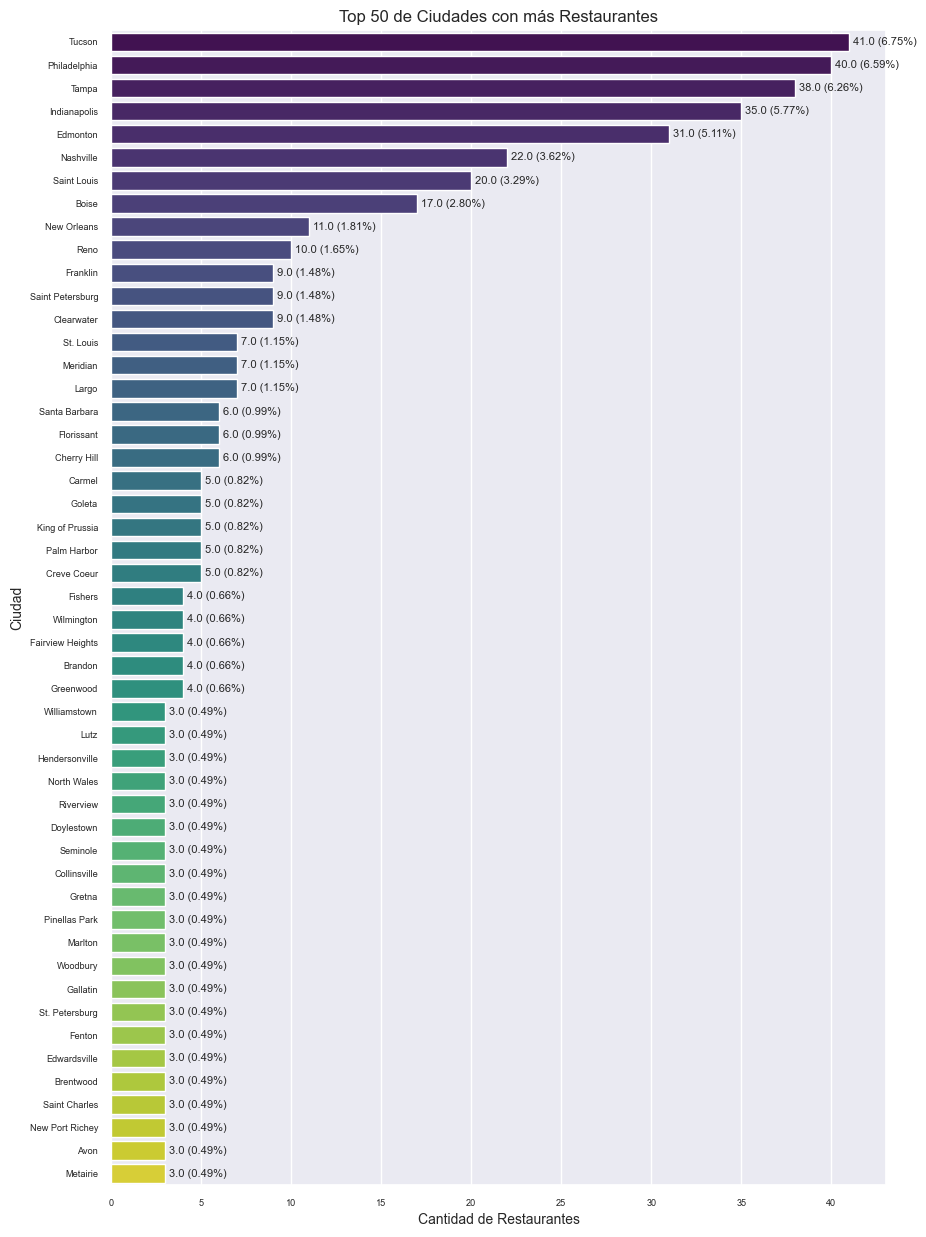

Top 10 de Ciudades con más Restaurantes:
              Recuento  Porcentaje
city                              
Tucson              41        6.75
Philadelphia        40        6.59
Tampa               38        6.26
Indianapolis        35        5.77
Edmonton            31        5.11
Nashville           22        3.62
Saint Louis         20        3.29
Boise               17        2.80
New Orleans         11        1.81
Reno                10        1.65
Las 30 de Ciudades con menos Restaurantes:
city
Trenton            1
Swedesboro         1
Fairless Hills     1
Ridley Park        1
Delran             1
Magnolia           1
Meraux             1
Voorhees           1
Brownsburg         1
Odessa             1
Joelton            1
Marrero            1
Manchester         1
East Alton         1
Hazelwood          1
Kenner             1
Dresher            1
Pottstown          1
Westwego           1
Olivette           1
Maplewood          1
Oro Valley         1
King Of Prussia    1
High Rid

In [110]:
# Calcular el top 50 de ciudades con más restaurantes
top_ciudades = restaurants['city'].value_counts().nlargest(50)

# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = restaurants['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad en el top 50
porcentajes = (top_ciudades / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([top_ciudades, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 15))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Top 50 de Ciudades con más Restaurantes', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 de Ciudades con más Restaurantes:")
print(distribucion_por_ciudad.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Ciudades con menos Restaurantes:")
print(frecuencias_ciudad.tail(30))


In [12]:
# Frecuencias segun la ciudad
frecuencias_city = gas_stations['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(gas_stations) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_EstacionesServicio', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_EstacionesServicio,%
city,,
Tucson,10,10.99
Tampa,8,8.79
Clearwater,5,5.49
Nashville,5,5.49
Indianapolis,3,3.30
Horsham,2,2.20
Brandon,2,2.20
Whiteland,2,2.20
New Orleans,2,2.20


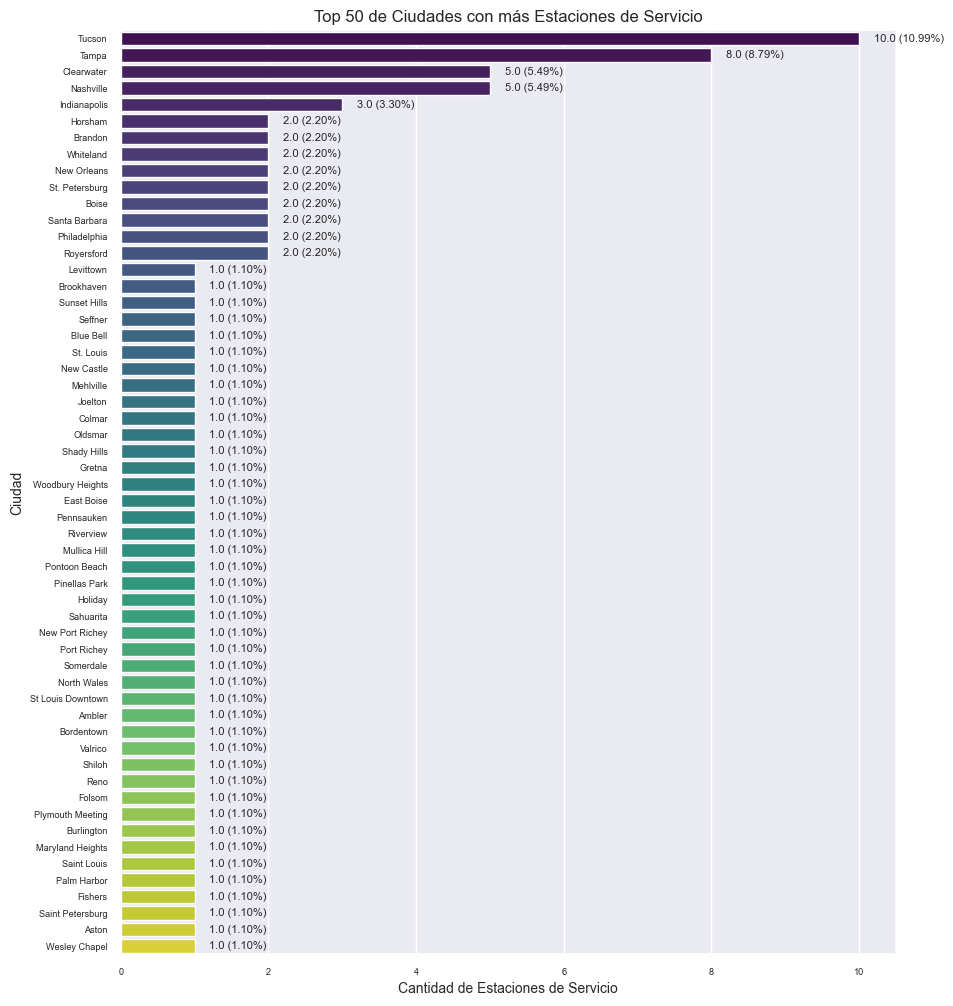

Top 10 de Ciudades con más Estaciones de Servicio:
                Recuento  Porcentaje
city                                
Tucson                10       10.99
Tampa                  8        8.79
Clearwater             5        5.49
Nashville              5        5.49
Indianapolis           3        3.30
Horsham                2        2.20
Brandon                2        2.20
Whiteland              2        2.20
New Orleans            2        2.20
St. Petersburg         2        2.20
Las 30 de Ciudades con menos Estaciones de Servicio:
city
Gretna               1
Woodbury Heights     1
East Boise           1
Pennsauken           1
Riverview            1
Mullica Hill         1
Pontoon Beach        1
Pinellas Park        1
Holiday              1
Sahuarita            1
New Port Richey      1
Port Richey          1
Somerdale            1
North Wales          1
St Louis Downtown    1
Ambler               1
Bordentown           1
Valrico              1
Shiloh               1
Reno      

In [112]:
# Calcular el top 50 de ciudades con más estaciones de servicio
top_ciudades = gas_stations['city'].value_counts().nlargest(50)

# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = gas_stations['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (frecuencias_ciudad / len(gas_stations) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([frecuencias_ciudad, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 12))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Top 50 de Ciudades con más Estaciones de Servicio', fontsize=12)
plt.xlabel('Cantidad de Estaciones de Servicio', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 de Ciudades con más Estaciones de Servicio:")
print(distribucion_por_ciudad.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 de Ciudades con menos Estaciones de Servicio:")
print(frecuencias_ciudad.tail(30))

Franquicias

In [14]:
# Cantidad de franquicias
cant_franc = restaurants['name'].nunique()
print(f'Se encontraron {cant_franc} Franquicias diferentes en el estado de Florida segun los datos de Yelp')

Se encontraron 142 Franquicias diferentes en el estado de Florida segun los datos de Yelp


In [15]:
# Calcular el recuento total para cada name
frecuencias_name = restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada name
porcentajes = (frecuencias_name / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Cant_Restaurantes', '%']

# Calcular el recuento de cada name por city
recuento_name_por_ciudad = restaurants.groupby(['name', 'city']).size().unstack(fill_value=0)

# Fusionar los resultados con el DataFrame principal
distribucion_por_franquicia = distribucion_por_franquicia.merge(recuento_name_por_ciudad, how='left', left_index=True, right_index=True)

# Visualizar DataFrame
distribucion_por_franquicia

,Cant_Restaurantes,%,Alton,Apollo Beach,Arnold,Aston,Avon,Bala Cynwyd,Belleville,Bensalem,...,West Chester,Westwego,White House,Whitestown,Williamstown,Willow Grove,Wilmington,Woodbury,Zephyrhills,Zionsville
name,,,,,,,,,,,,,,,,,,,,,
Taco Bell,76,12.52,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Pizza Hut,40,6.59,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
Chipotle Mexican Grill,25,4.12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Panda Express,21,3.46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jack in the Box,18,2.97,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No-1 China,2,0.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China Buffet,2,0.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calypso Cafe,2,0.33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En la tabla anterior podemos ver la cantidad de sucursales por franquicia y las ciudades en las que estas se distribuyen

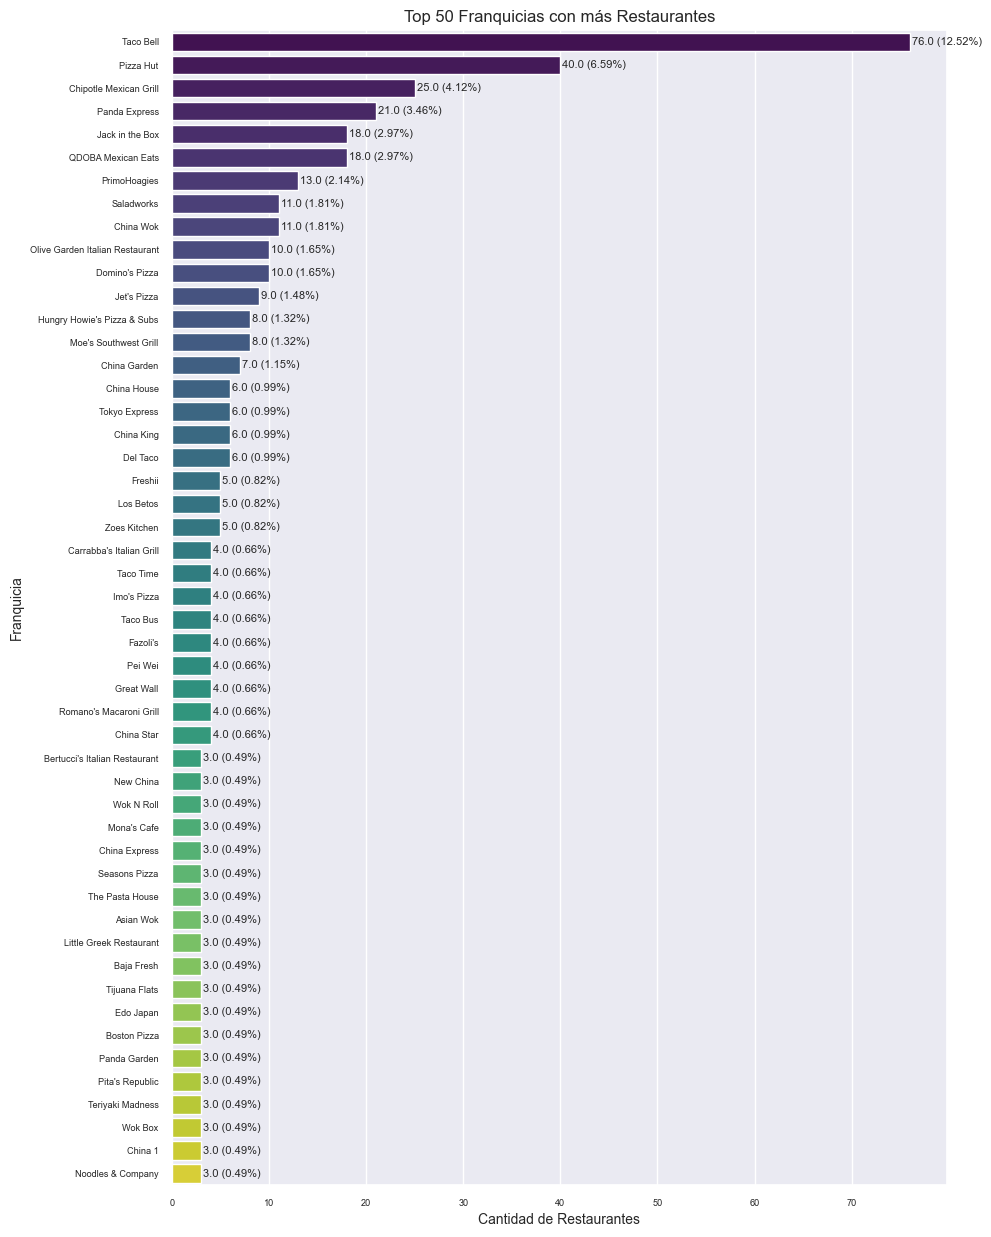

Top 10 de Ciudades con más Restaurantes:
name
Taco Bell                          76
Pizza Hut                          40
Chipotle Mexican Grill             25
Panda Express                      21
Jack in the Box                    18
QDOBA Mexican Eats                 18
PrimoHoagies                       13
Saladworks                         11
China Wok                          11
Olive Garden Italian Restaurant    10
Name: count, dtype: int64
Las 30 Franquicias con menos Restaurantes:
name
Los Betos                        5
Zoes Kitchen                     5
Carrabba's Italian Grill         4
Taco Time                        4
Imo's Pizza                      4
Taco Bus                         4
Fazoli's                         4
Pei Wei                          4
Great Wall                       4
Romano's Macaroni Grill          4
China Star                       4
Bertucci's Italian Restaurant    3
New China                        3
Wok N Roll                       3
Mona's Caf

In [114]:
# Calcular el top 50 de franquicias con mas restaurantes
frecuencias_name = restaurants['name'].value_counts().nlargest(50)

# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_name / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 15))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_franquicia.index, data=distribucion_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_franquicia.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Top 50 Franquicias con más Restaurantes', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Franquicia', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 Franquicias con más Restaurantes:")
print(frecuencias_name.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Franquicias con menos Restaurantes:")
print(frecuencias_name.tail(30))

Puntuacion promedio por franquicia

In [17]:
# Calcular la puntuación promedio de cada franquicia
puntuacion_promedio_por_franquicia = restaurants.groupby('name')['stars'].mean().round(2).to_frame().sort_values(by='stars', ascending=False)

# Visualizar el resultado
puntuacion_promedio_por_franquicia

,stars
name,
Fresh Kitchen,4.50
Italian Centre Shop,4.50
Cross Culture,4.50
Pokeworks,4.25
Ginza,4.25
...,...
Taco Bell,2.16
Mandarin Buffet,2.00
Viva Burrito,2.00


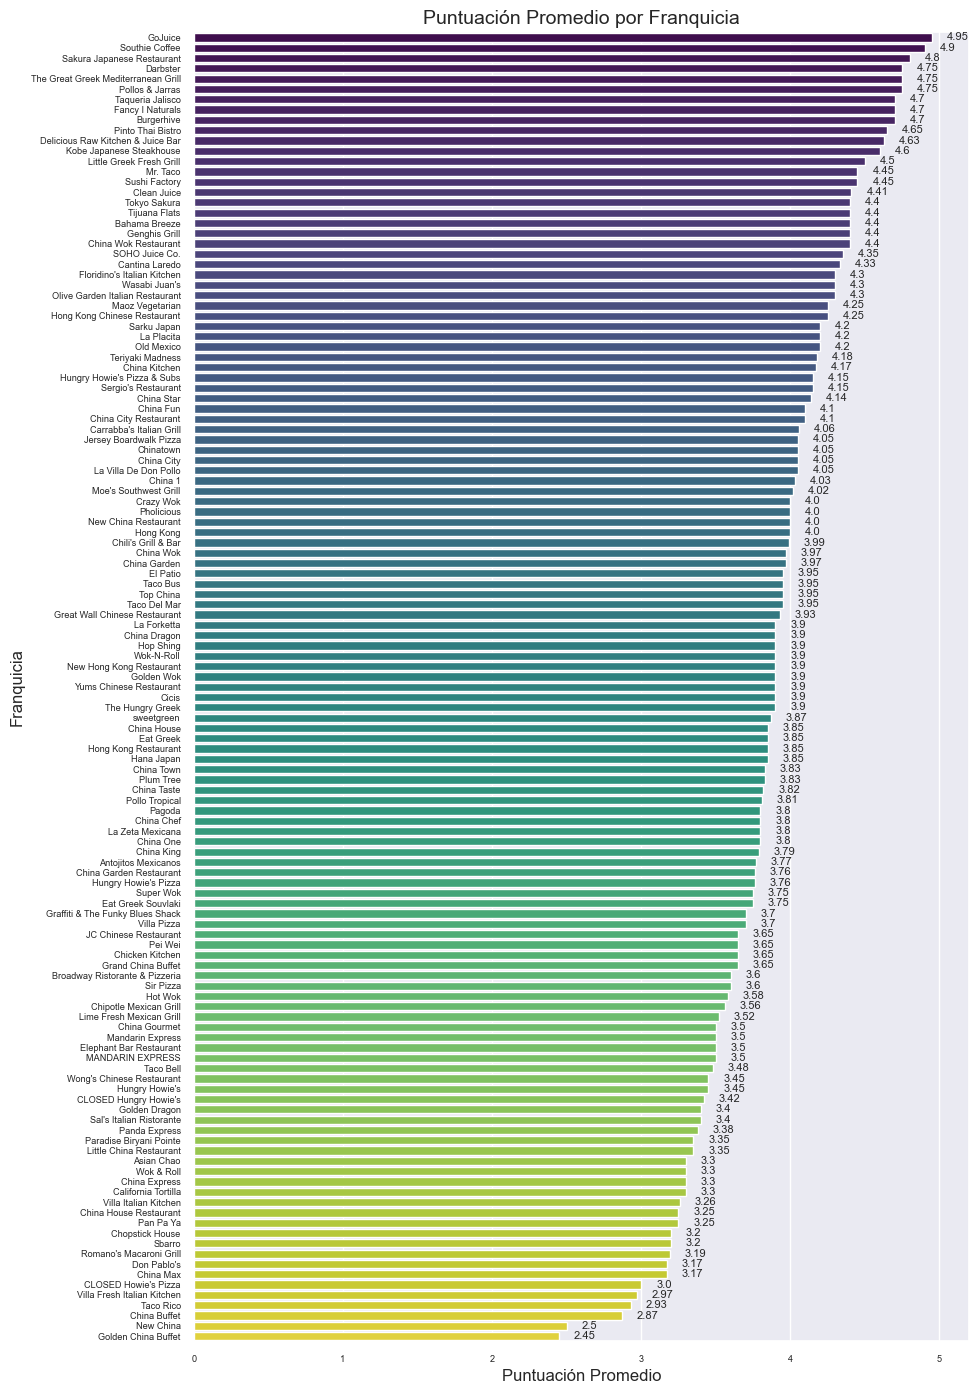

Top 25 Franquicias mejor puntuadas:
                                     stars
name                                      
GoJuice                               4.95
Southie Coffee                        4.90
Sakura Japanese Restaurant            4.80
Darbster                              4.75
The Great Greek Mediterranean Grill   4.75
Pollos & Jarras                       4.75
Taqueria Jalisco                      4.70
Fancy I Naturals                      4.70
Burgerhive                            4.70
Pinto Thai Bistro                     4.65
Delicious Raw Kitchen & Juice Bar     4.63
Kobe Japanese Steakhouse              4.60
Little Greek Fresh Grill              4.50
Mr. Taco                              4.45
Sushi Factory                         4.45
Clean Juice                           4.41
Tokyo Sakura                          4.40
Tijuana Flats                         4.40
Bahama Breeze                         4.40
Genghis Grill                         4.40
China Wok Restaura

In [118]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 17))
sns.barplot(x='stars', y='name', data=puntuacion_promedio_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Configurar título y etiquetas de ejes
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(puntuacion_promedio_por_franquicia.iterrows()):
    prom = row['stars']
    plt.text(prom + 0.1, i, f'{prom}', ha='left', va='center', fontsize=8)

# Mostrar el gráfico
plt.show()

# Imprimir el top 25 con sus valores relativos
print("Top 25 Franquicias mejor puntuadas:")
print(puntuacion_promedio_por_franquicia.head(25))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Franquicias peor puntuadas:")
print(puntuacion_promedio_por_franquicia.tail(30))

Variacion de la puntuacion segun sucursales de la misma franquicia

In [19]:
# Establece las opciones de visualización de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', 62)  # Muestra todas las filas
pd.set_option('display.max_columns', 20)  # Muestra todas las columnas

In [20]:
# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
franquicia_ciudad = restaurants[['name', 'city','stars']]

# Ordenar segun Franquicias
franquicia_ciudad = franquicia_ciudad.sort_values('name')
franquicia_ciudad = franquicia_ciudad.reset_index(drop=True)

# Establecer name como indice
franquicia_ciudad = franquicia_ciudad.set_index('name')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
franquicia_ciudad['stars_var'] = franquicia_ciudad['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
franquicia_ciudad = franquicia_ciudad.sort_index()

# Mostrar el DataFrame resultante
franquicia_ciudad

,city,stars,stars_var
name,,,
1000 Degrees Neapolitan Pizzeria,Deptford,4.5,1.125
1000 Degrees Neapolitan Pizzeria,Marlton,3.0,1.125
Alpha Pizzeria,Spring Hill,2.5,0.125
Alpha Pizzeria,Port Richey,3.0,0.125
Asian Cafe,Smyrna,3.0,0.125
...,...,...,...
Zoes Kitchen,Metairie,3.5,0.200
Zoes Kitchen,Tampa,4.5,0.200
Zoes Kitchen,Harahan,3.5,0.200


1. **Franquicia con Mayor Variación:**
   - Nombre: 1000 Degrees Neapolitan Pizzeria
   - Variación: 1.125

2. **Variación Promedio por Franquicia:**
   - Variación Promedio: 0.362
   - Desviación Estándar de la Variación: 0.380


Observación: Las franquicias con mayor variación tienen puntuaciones más dispersas, indicando que algunas sucursales reciben calificaciones muy diferentes. Las franquicias con menor variación tienen puntuaciones más homogéneas, sugiriendo una experiencia consistente en sus distintas sucursales.

Total de reviews por franquicia

In [171]:
franquicias_con_mas_reviews = restaurants.groupby('name')['review_count'].sum().to_frame().sort_values(by='review_count', ascending=False).reset_index(drop=False)

# Visualizar el resultado
franquicias_con_mas_reviews.head(10)

,name,review_count
0,Han Dynasty,2457
1,El Charro Cafe,1983
2,Taco Bell,1783
3,Chipotle Mexican Grill,1704
4,Yard House,1529
5,Taco Bus,1496
6,Pizzeria Vetri,964
7,Olive Garden Italian Restaurant,954
8,Fresh Kitchen,904
9,Panda Express,830


La franquicia con mayor cantidad de reviews es Han Dynasty con 2457 reviews

Relacion entre total de reviews por franquicia y puntuacion promedio

In [172]:
# Añadir la columna 'stars' del DataFrame 'puntuacion_promedio_por_franquicia' a 'franquicias_con_mas_reviews'
franquicias_reviews_puntuacion = pd.merge(franquicias_con_mas_reviews, puntuacion_promedio_por_franquicia[['stars']], on='name')
franquicias_reviews_puntuacion = franquicias_reviews_puntuacion.sort_values(by='review_count', ascending=False)

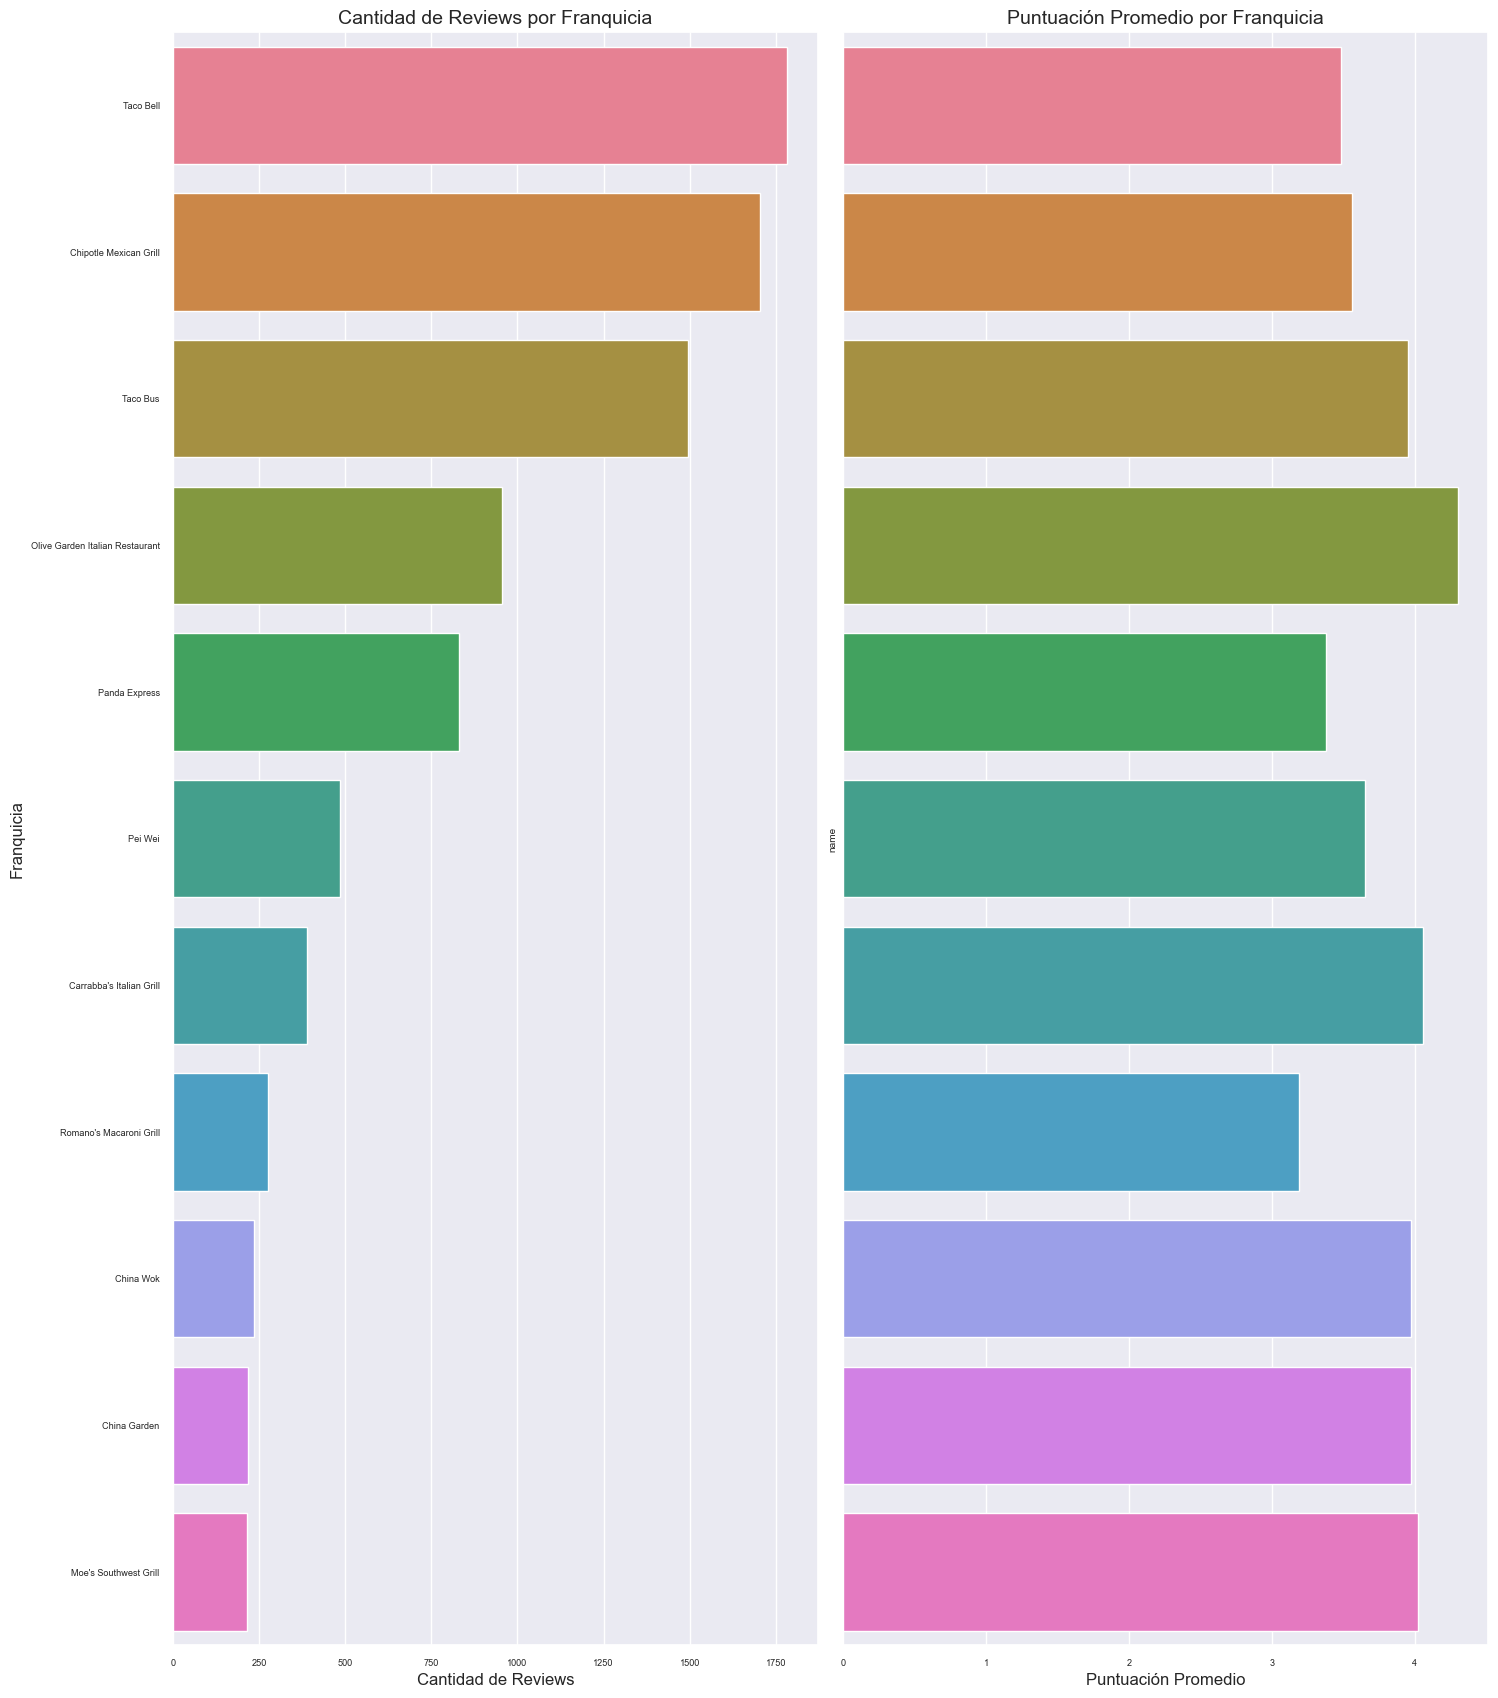

                               name  review_count  stars
0                         Taco Bell          1783   3.48
1            Chipotle Mexican Grill          1704   3.56
2                          Taco Bus          1496   3.95
3   Olive Garden Italian Restaurant           954   4.30
4                     Panda Express           830   3.38
5                           Pei Wei           485   3.65
6          Carrabba's Italian Grill           389   4.06
7           Romano's Macaroni Grill           276   3.19
8                         China Wok           236   3.97
9                      China Garden           218   3.97
10            Moe's Southwest Grill           214   4.02


In [175]:
# Filtrar franquicias donde review count es mayor a 200 para tener representaciones mas solidas
franquicias_reviews_puntuacion_filtradas = franquicias_reviews_puntuacion[franquicias_reviews_puntuacion['review_count'] > 200]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 17))

# Crear el primer gráfico de barras (cantidad de reviews por franquicia)
plt.subplot(1, 2, 1)  # Organizar en una matriz de 1 fila y 2 columnas, y seleccionar el primer subplot
sns.barplot(x='review_count', y='name', data=franquicias_reviews_puntuacion_filtradas, hue='name', dodge=False, legend=False)
plt.title('Cantidad de Reviews por Franquicia', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Crear el segundo gráfico de barras (puntuación promedio por franquicia)
plt.subplot(1, 2, 2)  # Seleccionar el segundo subplot
sns.barplot(x='stars', y='name', data=franquicias_reviews_puntuacion_filtradas, hue='name', dodge=False, legend=False)
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.yticks([])  # Ocultar las marcas y etiquetas del eje y del segundo subplot

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

print(franquicias_reviews_puntuacion_filtradas)

Observamos que aquellas en franquicias con mayor cantidad de reviews hay una tendencia a tener una mejor puntuacion si el numero de reviews es mayor. Pero tambien encontramos casos como 'Olive Garden Italian Restaurant' donde a menor cantidad de reviews encontramos mayores puntajes. Esto es un indicador de que el servicio es bueno y homogeneo en todas las sucursales de dicho restaurant. 

Categorias:

In [123]:
# Contabilizar keywords diferentes
print('Se encontraron', restaurants['categories'].nunique(), 'categorias de Restaurantes:\n' ,restaurants['categories'].unique())

Se encontraron 13 categorias de Restaurantes:
 ['Chinese' 'Mexican' 'Korean' 'Indian' 'Japanese' 'Italian' 'Asian'
 'Greek' 'Vegetarian' 'Vietnamese' 'Middle Eastern' 'Thai' 'Vegan']


In [124]:
# Frecuencias según la categoría
frecuencias_categories = restaurants['categories'].value_counts()

# Representación de porcentajes para cada categoría
porcentajes = (frecuencias_categories / len(restaurants) * 100).round(2)

# Crear DataFrame para las frecuencias y porcentajes
distribucion_por_categoria = pd.DataFrame({'RestPorCategoria': frecuencias_categories, '%': porcentajes})

# Resetear el índice para permitir el merge
distribucion_por_categoria.reset_index(inplace=True)

# Renombrar columnas
distribucion_por_categoria.rename(columns={'index': 'categories'}, inplace=True)

# Visualizar
distribucion_por_categoria

,categories,RestPorCategoria,%
0,Mexican,216,35.58
1,Italian,143,23.56
2,Chinese,140,23.06
3,Japanese,29,4.78
4,Vegetarian,24,3.95
5,Greek,11,1.81
6,Indian,10,1.65
7,Asian,10,1.65
8,Thai,10,1.65
9,Middle Eastern,7,1.15


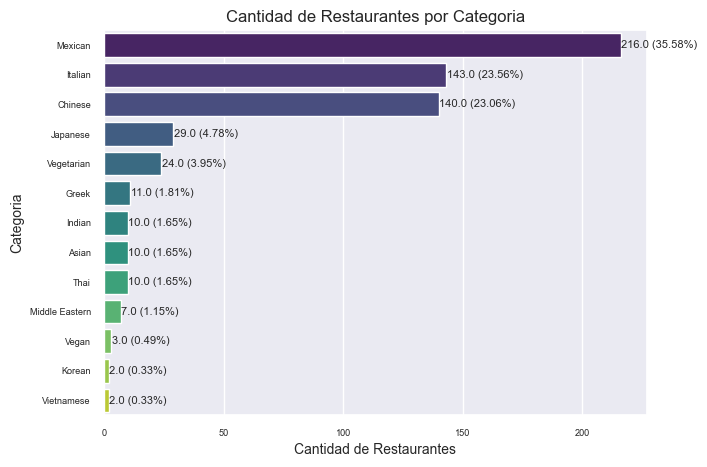

Categorias más populares:
                Recuento  Porcentaje
categories                          
Mexican              216       35.58
Italian              143       23.56
Chinese              140       23.06
Japanese              29        4.78
Vegetarian            24        3.95
Greek                 11        1.81
Indian                10        1.65
Asian                 10        1.65
Thai                  10        1.65
Middle Eastern         7        1.15
Vegan                  3        0.49
Korean                 2        0.33
Vietnamese             2        0.33


In [126]:
# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_categories / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_categoria = pd.concat([frecuencias_categories, porcentajes], axis=1)
distribucion_por_categoria.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_categoria.index, data=distribucion_por_categoria, palette="viridis", hue='categories', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_categoria.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Categoria', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Categoria', fontsize=10)

plt.show()

# Imprimir categorias mas populares
print("Categorias más populares:")
print(distribucion_por_categoria)

La información proporcionada indica que las categorías de restaurantes más populares son la Mexicana, Italiana y China.

### Check-in

In [127]:
# Obtener los 'business_id' únicos de metadata
business_ids_restaurants = restaurants['business_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'business_id' de metadata
df_check_in = df_check_in[df_check_in['business_id'].isin(business_ids_restaurants)]

In [128]:
# Filtrar las filas a partir del 2021 
df_check_in = df_check_in[df_check_in['date'] >= '2021-01-01'].reset_index(drop=True)

In [129]:
# Explora los primeros registros del DataFrame
df_check_in.head()

,business_id,date,hour
0,0-JRAY0LpBazDuA9761U5w,2021-01-06,01:36:58
1,0-JRAY0LpBazDuA9761U5w,2021-01-08,02:06:43
2,0-JRAY0LpBazDuA9761U5w,2021-01-24,00:11:31
3,0-JRAY0LpBazDuA9761U5w,2021-02-05,01:16:08
4,0-JRAY0LpBazDuA9761U5w,2021-02-28,23:06:47


In [130]:
df_check_in['business_id'] = df_check_in['business_id'].str.lstrip('---')
df_check_in

,business_id,date,hour
0,0-JRAY0LpBazDuA9761U5w,2021-01-06,01:36:58
1,0-JRAY0LpBazDuA9761U5w,2021-01-08,02:06:43
2,0-JRAY0LpBazDuA9761U5w,2021-01-24,00:11:31
3,0-JRAY0LpBazDuA9761U5w,2021-02-05,01:16:08
4,0-JRAY0LpBazDuA9761U5w,2021-02-28,23:06:47
...,...,...,...
2275,zS_iBFOBbZSNC1edaijD3A,2021-09-18,21:52:07
2276,zS_iBFOBbZSNC1edaijD3A,2021-11-21,20:02:09
2277,zS_iBFOBbZSNC1edaijD3A,2021-12-12,22:44:42
2278,zS_iBFOBbZSNC1edaijD3A,2022-01-02,00:54:52


In [35]:
# Obtener tipo de datos del DataFrame
df_check_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  2347 non-null   object
 1   date         2347 non-null   object
 2   hour         2347 non-null   object
dtypes: object(3)
memory usage: 55.1+ KB


**Descripción general:**

- **Tamaño:**  2.347 registros (confirmaciones de reservas) y 3 columnas (establecimiento, fecha y hora).
- **Tipos de datos:**
    - `object`: business_id, date, hour.

- **Variables nominales:**
    - `business_id`: Identificador único del establecimiento.

- **Variables categóricas:**
    - `date`: Fecha  de confirmación de reserva.
    - `hour`: Hora de confirmación de reserva.
 

In [131]:
# Obtén estadísticas descriptivas del DataFrame
df_check_in.describe()

,business_id,date,hour
count,2280,2280,2280
unique,301,381,2224
top,Hr_zdqPZ9VkGjKNv4UIQRg,2021-02-14,23:27:03
freq,95,16,3


In [132]:
duplicates = df_check_in.duplicated()
print(duplicates.sum())

0


In [39]:
df_check_in.isna().sum()

business_id    0
date           0
hour           0
dtype: int64

No se encontraron nulos

No se realizara un analisis mayor de esta tabla hasta no obtener mayor cantidad de informacion

## Review


In [133]:
# Obtener los 'business_id' únicos de metadata
reviews_restaurants = restaurants['business_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'business_id' de metadata
df_review = df_review[df_review['business_id'].isin(reviews_restaurants)]

In [134]:
# Filtrar las filas a partir del 2021 
df_review = df_review[df_review['date'] >= '2021-01-01'].reset_index(drop=True)

In [42]:
df_review.head()

,review_id,user_id,business_id,stars,date,hour,sentiment_analysis
0,-vIBy5HAGIDHzbn-I00KWA,YBX6DQznr_X3TsPwE_VmbA,0pL-eq0ufX5jMDgVAvoHHw,1.0,2021-01-24,00:33:26,1
1,Q8UuZDPMYBxjQgc6VOmR_g,h_O4KzckWBKH4cwhsXAv1A,u7_3L1NBWgxhBM_B-cmmnA,3.0,2021-03-07,14:25:22,2
2,m6pCaUpL7o90g-48TZZuYQ,gcMPEkEXekKN6mYhLUI-Rw,u7_3L1NBWgxhBM_B-cmmnA,5.0,2021-10-10,11:16:27,1
3,EdiOf6SLJB494kzrx4pvzg,KqMdtoGdtb69qnbW1Jsq2Q,vQ5Qa6kvlXiUHT60G0RduA,5.0,2021-06-08,23:11:24,1
4,aqO4TR7OIF30LtoEY6spBg,6Z_8t8_JCvKKNWUlHb0rzQ,71MulAHeKm5p2kIIGYEwpA,3.0,2021-06-20,18:45:16,1


In [43]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           3501 non-null   object 
 1   user_id             3501 non-null   object 
 2   business_id         3501 non-null   object 
 3   stars               3501 non-null   float64
 4   date                3501 non-null   object 
 5   hour                3501 non-null   object 
 6   sentiment_analysis  3501 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 191.6+ KB


**Descripción general:**

- **Tamaño:** 3.501 registros (reviews) y 7 columnas (características).
- **Tipos de datos:**
    - `object`: review_id, user_id, business_id, date, hour.
    - `int64`: sentiment_analysis.
    - `float64`: stars.

- **Variables nominales:**
    - `review_id`: identificador unico de la resena
    - `user_id`: identificador unico del usuario que realizo la resena
    - `business_id`: identificador unico del establacimiento sobre el que se opino

- **Variables numéricas:**
    - `stars`: Representa las calificaciones en "estrellas" en un rango del 1 al 5, donde 1 es la calificación más baja y 5 es la más alta. En promedio, las calificaciones tienden a variar entre 3 y 4.

- **Variables categóricas:**
    - `date`: Fecha en la que se realizo la review
    - `hour`: Hora en la que se realizo la review 
    - `sentiment_analysis`: Sentiment analysis de reviews.

In [44]:
df_review.describe()

,stars,sentiment_analysis
count,3501.000000,3501.000000
mean,3.087404,1.124821
std,1.721565,0.410732
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.000000
75%,5.000000,1.000000
max,5.000000,4.000000


In [45]:
# Conteo para saber cuales son los establecimientos con mayor numero de reseñas
df_review['business_id'].value_counts()

business_id
LZzDvgfpkd4nI3E4L9wF1w    141
vQ5Qa6kvlXiUHT60G0RduA     84
gfLsBY-xsNE9-ktiTvTvGA     63
8zJYnVNKD7XUHaKFMMREBg     62
Hr_zdqPZ9VkGjKNv4UIQRg     54
                         ... 
NRhDoIZd5LKR7W1BxjE3_w      1
GWKUtWgoKQ0Wdr_TVkkZPw      1
izam2SZbp1f55jrScJ4Agw      1
7bcvLrwVEZN9iEeHxQrJPw      1
BxOCE5Wc0GnUAi2HnxkFxg      1
Name: count, Length: 453, dtype: int64

In [46]:
# Número de clientes que opinan más de una vez sobre el mismo establecimiento
clientes_establecimiento = df_review.groupby(['user_id', 'business_id']).size().reset_index(name='count')
clientes_multiples_reseñas = clientes_establecimiento[clientes_establecimiento['count'] > 1]

# Número de clientes que opinan solo una vez sobre el mismo establecimiento
clientes_reseñas_unicas = clientes_establecimiento[clientes_establecimiento['count'] == 1]

# Contar el número de 'user_id' para cada grupo 
numero_clientes_multiples_reseñas = clientes_multiples_reseñas['user_id'].nunique()
numero_clientes_reseñas_unicas = clientes_reseñas_unicas['user_id'].nunique()

# Proporción de clientes con múltiples o solo una reseña para el mismo establacimiento
proporcion_clientes_multiples_reseñas = numero_clientes_multiples_reseñas / df_review['user_id'].nunique() * 100
proporcion_clientes_reseñas_unicas = numero_clientes_reseñas_unicas / df_review['user_id'].nunique() * 100

# Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
rangos_por_user = df_review.groupby('user_id')['business_id'].nunique()

print(f"Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña")
print(rangos_por_user)
print(f"Clientes con mas de una reseña por establecimiento: {proporcion_clientes_multiples_reseñas}%")
print(f"Clientes con solo una reseña por establecimiento: {proporcion_clientes_reseñas_unicas}%")

Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
user_id
-0MIp6WKJ8QvGnYZQ5ETyg    1
-25rCItZJ8ahmfywga8U9A    1
-2BR_6N9rJevM_f-DE1oyg    1
-3fh2ptmK2iAN5mk7GN8IA    1
-4QNsqI4I_ef7I7bLFJ_uQ    1
                         ..
zvPoFmJSLPdlQUdbjKRPYQ    1
zvgcCvepyNZi8qy7aztuKA    1
zx9DFgh5LfZZn5-sVxTjhA    1
zy8vpv-D0tSwtA4wXa_t7A    1
zz275Uljp36FeP8pWtzo5A    1
Name: business_id, Length: 3333, dtype: int64
Clientes con mas de una reseña por establecimiento: 1.6201620162016201%
Clientes con solo una reseña por establecimiento: 98.46984698469848%


In [47]:
df_review.isna().sum()

review_id             0
user_id               0
business_id           0
stars                 0
date                  0
hour                  0
sentiment_analysis    0
dtype: int64

No se encontraron nulos

In [48]:
duplicates_review = df_review.duplicated('user_id')
print(duplicates_review.sum())

168


Se encontro multiples reseñas registradas para un usuario

In [49]:
# Organizar el DataFrame por la columna 'date' de menor a mayor
df_review_sorted = df_review.sort_values(by='date')

# Mostrar el primer y último valor de la columna 'date'
primer_valor = df_review_sorted['date'].iloc[0]
ultimo_valor = df_review_sorted['date'].iloc[-1]

print(f"Primer valor de 'date': {primer_valor}")
print(f"Último valor de 'date': {ultimo_valor}")

Primer valor de 'date': 2021-01-01
Último valor de 'date': 2022-01-19


Los datos incluyen informacion del periodo de un año

In [136]:
# Mapeamos 'business_id' a 'name' en un diccionario
id_to_name = dict(zip(restaurants['business_id'], restaurants['name']))

# Creamos una nueva columna 'name' en df_review usando el diccionario de mapeo
df_review['name'] = df_review['business_id'].map(id_to_name)
df_review.head()

,review_id,user_id,business_id,stars,date,hour,sentiment_analysis,name,H
0,-vIBy5HAGIDHzbn-I00KWA,YBX6DQznr_X3TsPwE_VmbA,0pL-eq0ufX5jMDgVAvoHHw,1.0,2021-01-24,00:33:26,1,Sakura,0
1,Q8UuZDPMYBxjQgc6VOmR_g,h_O4KzckWBKH4cwhsXAv1A,u7_3L1NBWgxhBM_B-cmmnA,3.0,2021-03-07,14:25:22,2,Pizzeria Vetri,14
2,m6pCaUpL7o90g-48TZZuYQ,gcMPEkEXekKN6mYhLUI-Rw,u7_3L1NBWgxhBM_B-cmmnA,5.0,2021-10-10,11:16:27,1,Pizzeria Vetri,11
3,EdiOf6SLJB494kzrx4pvzg,KqMdtoGdtb69qnbW1Jsq2Q,vQ5Qa6kvlXiUHT60G0RduA,5.0,2021-06-08,23:11:24,1,Condado Tacos,23
4,aqO4TR7OIF30LtoEY6spBg,6Z_8t8_JCvKKNWUlHb0rzQ,71MulAHeKm5p2kIIGYEwpA,3.0,2021-06-20,18:45:16,1,Italian Centre Shop,18


Sentiment Analysis:

In [52]:
# Calcula la cantidad de registros para cada valor único en 'sentiment_analysis'
sentiment_counts = df_review['sentiment_analysis'].value_counts()

# Calcula el total de registros en el DataFrame
total_registros = len(df_review)

# Calcula el porcentaje de cada valor único en 'sentiment_analysis' respecto al total de registros
porcentaje_por_valor = ((sentiment_counts / total_registros) * 100).round(2)

# Convierte los resultados en un DataFrame para facilitar su manipulación
df_porcentaje = porcentaje_por_valor.reset_index()
df_porcentaje.columns = ['sentiment_analysis', 'porcentaje']
df_porcentaje = df_porcentaje.sort_values(by='sentiment_analysis', ascending=True).reset_index(drop=True)
df_porcentaje['Descripcion'] = ['Negativo','Neutro','Positivo','Muy Positivo']

# Visualizar resultado
df_porcentaje

,sentiment_analysis,porcentaje,Descripcion
0,1,90.17,Negativo
1,2,7.48,Neutro
2,3,2.03,Positivo
3,4,0.31,Muy Positivo


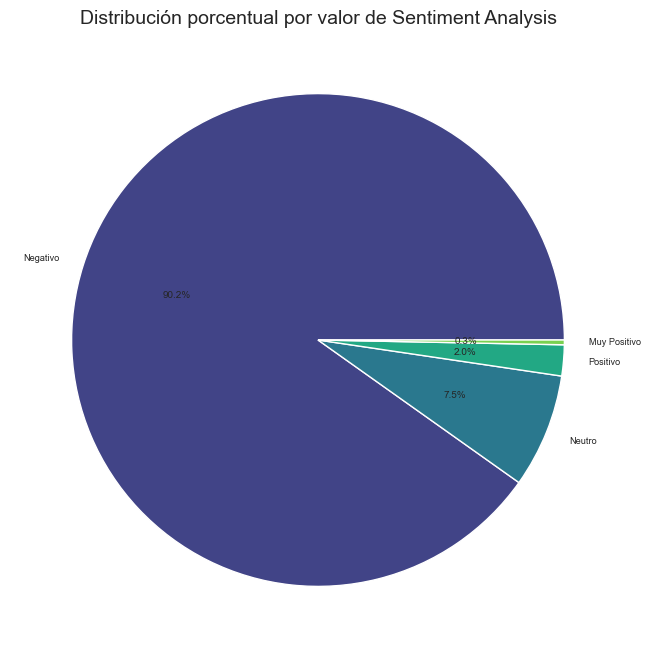

In [53]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(8, 8))

# Porcentajes y etiquetas
porcentajes = df_porcentaje['porcentaje']
etiquetas = df_porcentaje['Descripcion']

# Colores
colores = sns.color_palette("viridis", len(etiquetas))

# Graficar el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colores)

# Título del gráfico
plt.title('Distribución porcentual por valor de Sentiment Analysis', fontsize=14)

# Mostrar el gráfico
plt.show()

Se analizaron las reseñas utilizando un sistema de análisis de sentimiento que las clasificó en cuatro categorías:

* Negativo: Sentimiento negativo hacia el producto o servicio.
* Neutro: Sentimiento neutral o indiferente.
* Positivo: Sentimiento positivo hacia el producto o servicio.
* Muy Positivo: Sentimiento muy favorable hacia el producto o servicio.



La mayoría de las reseñas (90.2%) tienen un sentimiento negativo, lo que indica que hay una considerable insatisfacción. También hay una cantidad significativa de reseñas con un sentimiento neutro (7.5%). El porcentaje de reseñas buenas y muy buenas es bajo (2%) y (0.3%).

Sensentiment_analysis mas frecuente por business_id (establecimientos):

In [54]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'business_id'
mode_sentiment = df_review.groupby('business_id')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame()

# Agregamos 'name' correspondiente a cada 'business_id'
mode_sentiment = pd.merge(mode_sentiment, df_review[['business_id', 'name']], on='business_id', how='left').drop_duplicates().sort_values(by='sentiment_analysis', ascending=False).reset_index(drop=True)

# Mostrar el resultado
mode_sentiment

,business_id,sentiment_analysis,name
0,zx7XemDyT296vmKnFtZSyQ,3,Tiffin India's Fresh Kitchen
1,5GtSeo2OyXeSveJn5Ojxig,2,Mona's Cafe
2,KkWQcqDPsZb6K5R5T-XJCg,2,Taco Bell
3,XjzFw6VRgs9zeHmgqaHIlw,2,China Garden
4,fAbqUtRlWiZvx1a763wNzg,2,Taco Bell
...,...,...,...
448,I-_INTauk4ua69LcBCWk8A,1,Taco Bell
449,Hr_zdqPZ9VkGjKNv4UIQRg,1,Yard House
450,Hj5K3FMO8DoG7x8XALgISg,1,Del Taco
451,HenDs6LteYwam5-PdcqZbw,1,Olive Garden Italian Restaurant


Los 6 establecimientos en los que preodominan reviews mas positivas pertenecen a Tiffin India's Fresh Kitchen, Mona's Cafe, 2 a Taco Bell, y China Garden.

Sensentiment_analysis mas frecuente por Franquicia

In [139]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'name'
mode_name = df_review.groupby('name')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame().sort_values(by='sentiment_analysis', ascending=False)

# Mostrar el resultado
mode_name

,sentiment_analysis
name,
Alpha Pizzeria,1
Olive Garden Italian Restaurant,1
Romano's Macaroni Grill,1
QDOBA Mexican Eats,1
PrimoHoagies,1
...,...
El Sitio,1
El Meson Mexican Restaurant,1
El Mariachi,1


Distribucion de registros de reviews en 24 hs:

C:\Users\ponoh\AppData\Local\Temp\ipykernel_4916\4095869971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review['H'] = pd.to_datetime(df_review['hour'])


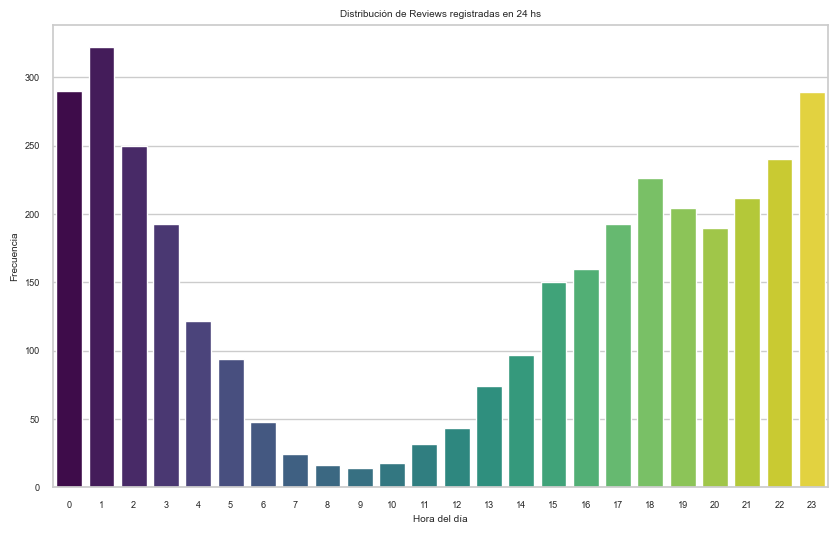

In [56]:
# Convertir la columna 'hour' a tipo datetime
df_review['H'] = pd.to_datetime(df_review['hour'])

# Extraer la hora de cada entrada
df_review['H'] = df_review['H'].dt.hour

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot
sns.countplot(x='H', data=df_review, palette='viridis', hue='H', legend=False)

# Configurar título y etiquetas de ejes
plt.title('Distribución de Reviews registradas en 24 hs')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Segun el grafico anterior se ve mayor actividad de los usuarios, realizando reviews de los restaurantes desde las 16 hs hasta las 2 hs. Esto concuerda con la actividad y horarios en los que los establecimientos gastronomicos suelen estar abiertos y en los cuales suele concurrir mas clientes.

---

## Google Maps

In [140]:
# Importacion de datasets Google Maps
df_metadata = pd.read_csv('datasets/procesados/metadata_procesado_GoogleMaps.csv')

df_review_states = pd.read_csv('datasets/procesados/review_state_procesado_GoogleMaps.csv')

### Metadata

In [141]:
df_metadata.head()

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,categories,review_count,tags,hours,url
0,0x88e635378f43352f:0xa1b53c63436fa428,Shell,"15877 E, FL-40",Silver Springs,FL,34488,29.183272,-81.889965,1.8,Gas Station,5,"['Gas Station', 'Atm', 'Convenience Store', 'R...","[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",https://www.google.com/maps/place//data=!4m2!3...
1,0x88d901cf9b30e949:0x45ea9286f8c596c2,Exxon,621 W Broward Blvd,Fort Lauderdale,FL,33312,26.122500,-80.150300,5.0,Gas Station,1,['Gas Station'],"[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",https://www.google.com/maps/place//data=!4m2!3...
2,0x88e8a13da9b3fea3:0x59a99647bb951969,Circle K,4310 SE Hawthorne Rd,Gainesville,FL,32641,29.635547,-82.272016,3.5,Gas Station,4,"['Convenience Store', 'Atm', 'Coffee Shop', 'G...","[['Thursday', 'Open 24 hours'], ['Friday', 'Op...",https://www.google.com/maps/place//data=!4m2!3...
3,0x88db592776a2303f:0x217bffde2d2e30c8,7 Eleven,26920 Jones Loop Rd,Punta Gorda,FL,33982,26.896282,-81.995669,5.0,Gas Station,1,['Gas Station'],NaN,https://www.google.com/maps/place//data=!4m2!3...
4,0x88e76156b262d32b:0x1db1a887284e0fd8,Speedway,10024 Lee Vista Blvd,Orlando,FL,32829,28.477886,-81.246483,4.1,Gas Station,17,"['Convenience Store', 'Gas Station']","[['Wednesday', 'Open 24 hours'], ['Thursday', ...",https://www.google.com/maps/place//data=!4m2!3...


In [143]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3469 entries, 0 to 3468
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gmap_id       3469 non-null   object 
 1   name          3469 non-null   object 
 2   address       3469 non-null   object 
 3   city          3469 non-null   object 
 4   state         3469 non-null   object 
 5   postal_code   3469 non-null   int64  
 6   latitude      3469 non-null   float64
 7   longitude     3469 non-null   float64
 8   stars         3469 non-null   float64
 9   categories    3469 non-null   object 
 10  review_count  3469 non-null   int64  
 11  tags          3469 non-null   object 
 12  hours         2919 non-null   object 
 13  url           3469 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 406.5+ KB


**Descripción general:**

- **Tamaño:** 3469 registros (Establecimientos) y 14 columnas (características).
- **Tipos de datos:**
    - `object`: name, address, city, state, categories, hours, gmap_id, url.
    - `int64`: postal_code, review_count.
    - `float64`: stars, latitude, longitude.

- **Variables nominales:**
    - `name`: Nombre del establecimiento.
    - `url`: direccion url de google maps.
    - `gmap_id`: Codigo de localizacion de Google maps.

- **Variables numéricas:**
    - `stars`: Puntaje promedio en 'Estrellas' entre 1 y 5.
    - `review_count`: cantidad de resenias.

- **Variables categóricas:**
    - `address`: Direccion del establecimiento.
    - `city`: Ciudad en la que se encuentra el establecimiento.
    - `state`: Estado en la que se encuentra el establecimiento.
    - `postal_code`: Codigo postal correspondiente a localizacion del establecimiento.
    - `latitude`, `longitude`: Coordenadas del establecimiento.
    - `categories`: Categoria del establecimiento.
    - `tags` : Sub categorias que describen el establecimiento.

- **Variable estructurada**
    - `hours`: dias y horarios en los que se encuentra abierto.`

In [61]:
df_metadata.isna().sum()

gmap_id           0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
categories        0
review_count      0
tags              0
hours           550
url               0
dtype: int64

Se encontraron nulos en las columnas: name, address, description, category, price, hours, MISC, state, relative_results

In [63]:
# Registros duplicados
df_metadata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3464    False
3465    False
3466    False
3467    False
3468    False
Length: 3469, dtype: bool

### Analisis de variables

Ciudades

In [142]:
# Filtrar el DataFrame por la columna 'state'
df_metadata = df_metadata.loc[df_metadata['state'] == 'FL']


In [144]:
# Separar establecimientos en gastronomicos y estaciones de servicio
g_restaurants = df_metadata[~df_metadata['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

g_gas_stations = df_metadata[df_metadata['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

# Visualizar Cantidad de Restaurantes y Estaciones de Servicio
print('Cantidad de Restaurantes: ', len(g_restaurants))
print('Cantidad de Estaciones de Servicio: ', len(g_gas_stations))

Cantidad de Restaurantes:  479
Cantidad de Estaciones de Servicio:  2990


In [145]:
# Estos registros se consideraran como franquicias al identificarse con el mismo nombre y encontrarse en distintas locaciones
g_restaurants = g_restaurants[g_restaurants.duplicated(subset='name', keep=False)]

In [146]:
# Frecuencias segun la ciudad
frecuencias_city = g_restaurants['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(g_restaurants) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_Restaurantes', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_Restaurantes,%
city,,
Miami,32,6.68
Jacksonville,30,6.26
Orlando,27,5.64
Tampa,22,4.59
Naples,10,2.09
...,...,...
Palm Harbor,1,0.21
Winter Park,1,0.21
Key Largo,1,0.21


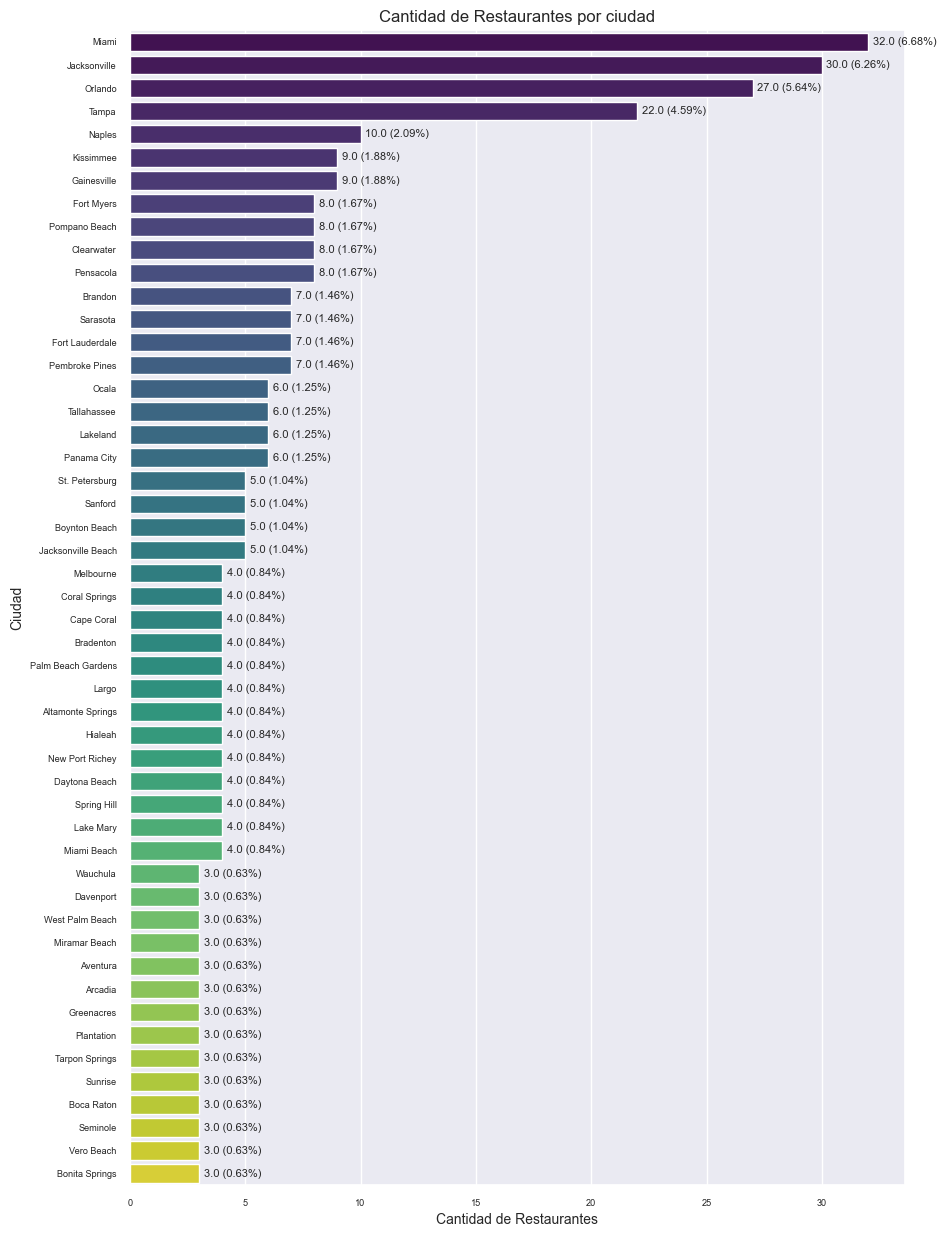

Top 10 de Ciudades con más Restaurantes:
               Recuento  Porcentaje
city                               
Miami                32        6.68
Jacksonville         30        6.26
Orlando              27        5.64
Tampa                22        4.59
Naples               10        2.09
Kissimmee             9        1.88
Gainesville           9        1.88
Fort Myers            8        1.67
Pompano Beach         8        1.67
Clearwater            8        1.67

Las 30 Ciudades con menos Restaurantes:
city
Milton              1
Doral               1
Venice              1
Clermont            1
Coconut Grove       1
Lutz                1
Land O' Lakes       1
Alachua             1
Parkland            1
Crawfordville       1
Weston              1
Tamarac             1
Windermere          1
Crescent City       1
Haverhill           1
West Melbourne      1
Yulee               1
Keystone Heights    1
Davie               1
Madison             1
Destin              1
Ave Maria          

In [150]:
# Calcular el top 50 de ciudades con más restaurantes
top_ciudades = g_restaurants['city'].value_counts().nlargest(50)

# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = g_restaurants['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (top_ciudades / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([top_ciudades, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 15))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por ciudad', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 de Ciudades con más Restaurantes:")
print(distribucion_por_ciudad.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Ciudades con menos Restaurantes:")
print(frecuencias_ciudad.tail(30))

In [151]:
# Frecuencias segun la ciudad
frecuencias_city = g_gas_stations['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(g_gas_stations) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_EstacionesServicio', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_EstacionesServicio,%
city,,
Jacksonville,183,6.12
Miami,151,5.05
Tampa,132,4.41
Orlando,128,4.28
Lakeland,55,1.84
...,...,...
West Miami,1,0.03
Stock Island,1,0.03
Tierra Verde,1,0.03


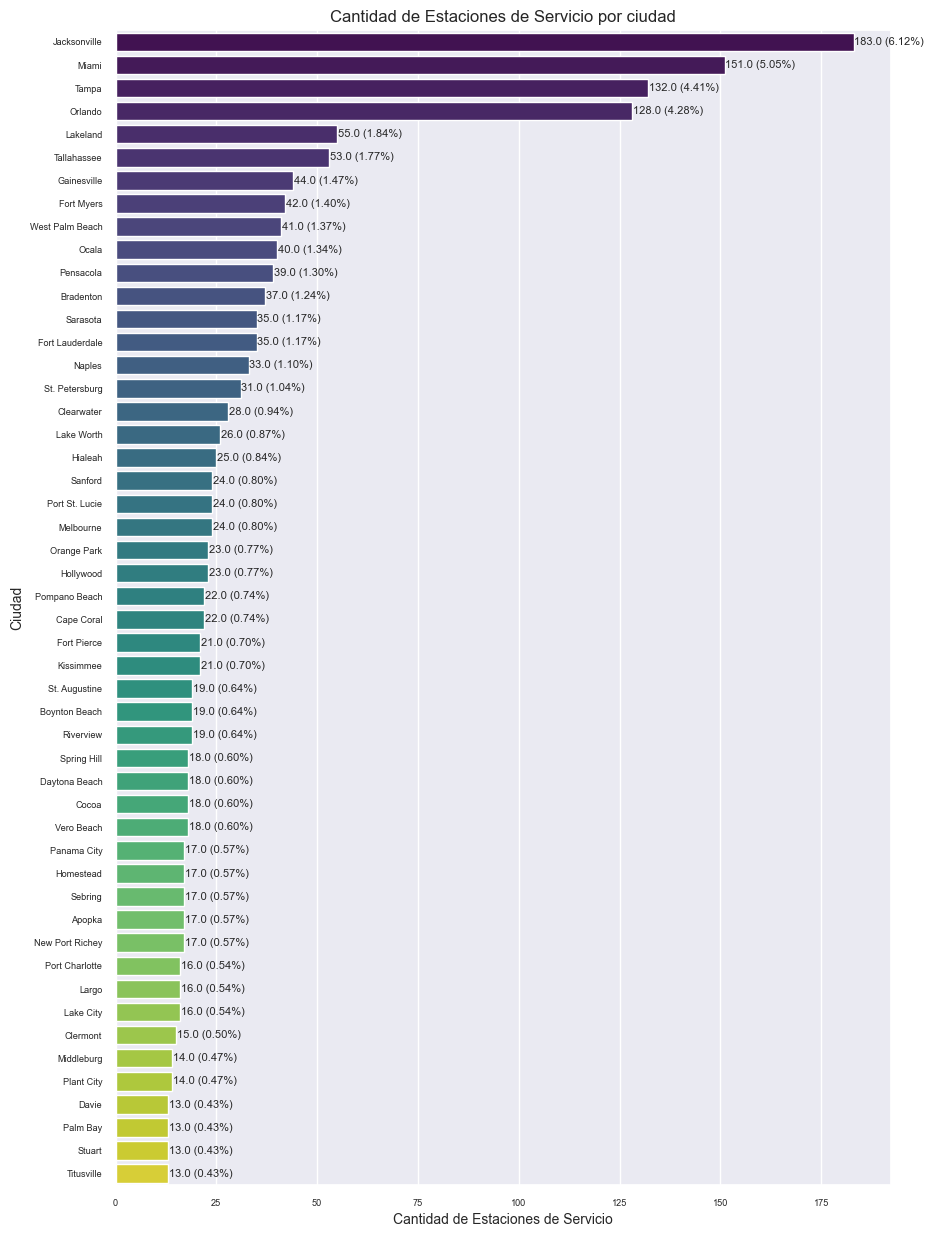

Top 10 de Ciudades con más Estaciones de Servicio:
                 Recuento  Porcentaje
city                                 
Jacksonville          183        6.12
Miami                 151        5.05
Tampa                 132        4.41
Orlando               128        4.28
Lakeland               55        1.84
Tallahassee            53        1.77
Gainesville            44        1.47
Fort Myers             42        1.40
West Palm Beach        41        1.37
Ocala                  40        1.34

Las 30 de Ciudades con menos Estaciones de Servicio:
city
Crescent City            1
Lake Hamilton            1
East Palatka             1
PERRY                    1
Immokalee                1
San Antonio              1
Grand Island             1
Tice                     1
Monticello               1
Malone                   1
Belle Isle               1
Hilliard                 1
Lithia                   1
Pierson                  1
Indian Harbour Beach     1
Bellview                 1
La

In [152]:
# Calcular el top 50 de ciudades con más estaciones de servicio
top_ciudades = g_gas_stations['city'].value_counts().nlargest(50)

# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = g_gas_stations['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (top_ciudades / len(g_gas_stations) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([top_ciudades, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 15))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Estaciones de Servicio por ciudad', fontsize=12)
plt.xlabel('Cantidad de Estaciones de Servicio', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 de Ciudades con más Estaciones de Servicio:")
print(distribucion_por_ciudad.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 de Ciudades con menos Estaciones de Servicio:")
print(frecuencias_ciudad.tail(30))

Franquicias

In [153]:
# Cantidad de franquicias
cant_franc_g = g_restaurants['name'].nunique()
print(f'Se encontraron {cant_franc_g} Franquicias diferentes en el estado de Florida segun los datos de Google Maps')

Se encontraron 127 Franquicias diferentes en el estado de Florida segun los datos de Google Maps


In [154]:
# Calcular el recuento total para cada name
frecuencias_name = g_restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada name
porcentajes = (frecuencias_name / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Cant_Restaurantes', '%']

# Calcular el recuento de cada name por city
recuento_name_por_ciudad = g_restaurants.groupby(['name', 'city']).size().unstack(fill_value=0)

# Fusionar los resultados con el DataFrame principal
distribucion_por_franquicia = distribucion_por_franquicia.merge(recuento_name_por_ciudad, how='left', left_index=True, right_index=True)

# Visualizar DataFrame
distribucion_por_franquicia

,Cant_Restaurantes,%,Alachua,Altamonte Springs,Arcadia,Atlantic Beach,Ave Maria,Aventura,Belle Glade,Beverly Hills,...,Weston,Wewahitchka,Williston,Windermere,Winter Garden,Winter Haven,Winter Park,Winter Springs,Yulee,Zephyrhills
name,,,,,,,,,,,,,,,,,,,,,
Taco Bell,40,8.35,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Chipotle Mexican Grill,21,4.38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Hungry Howie's Pizza,16,3.34,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
China Wok,15,3.13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sbarro,15,3.13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New China,2,0.42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Villa Pizza,2,0.42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China Express,2,0.42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En la tabla anterior podemos ver la cantidad de sucursales por franquicia y las ciudades en las que estas se distribuyen

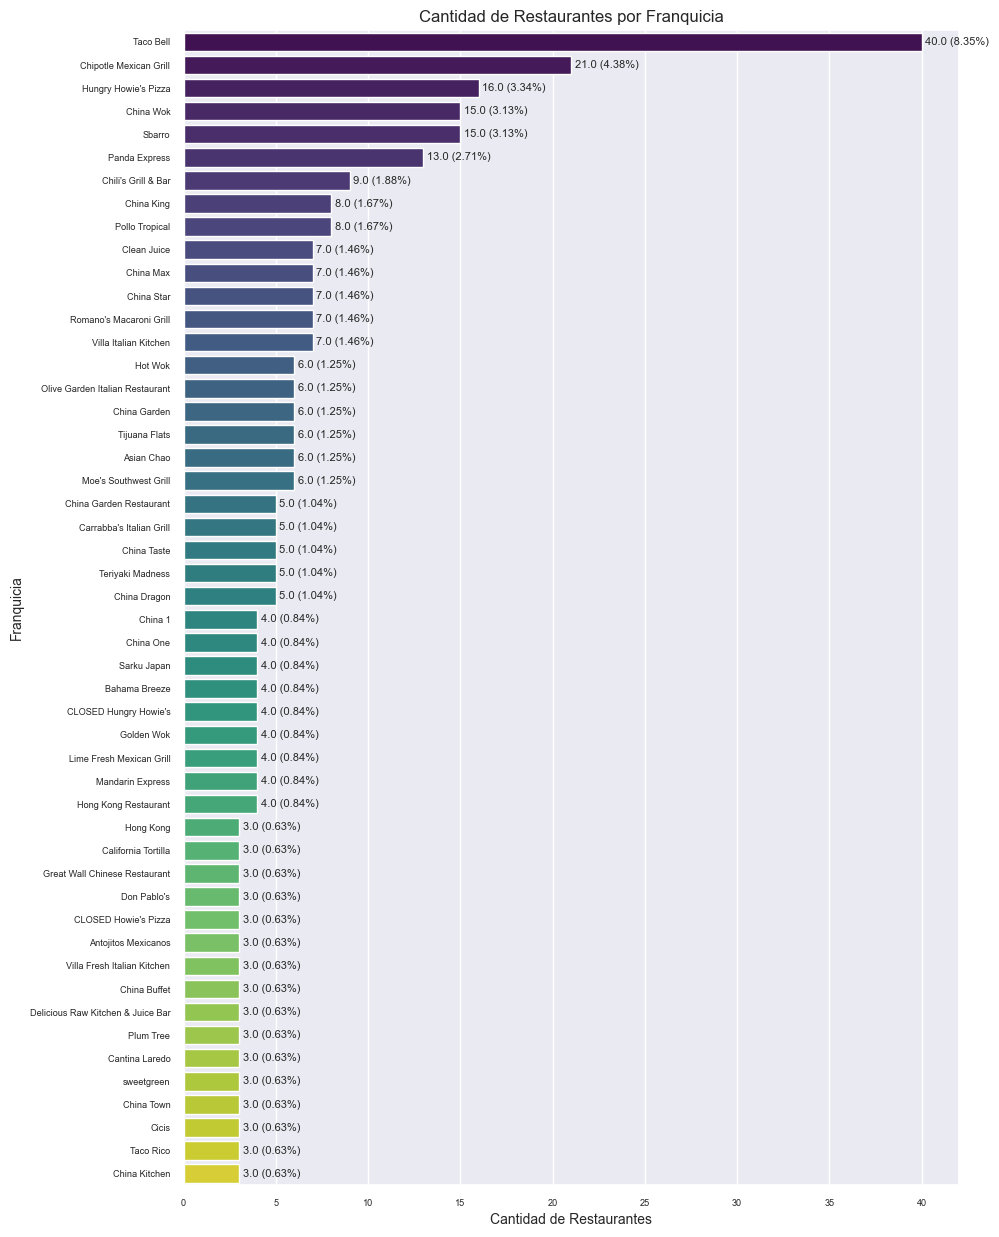

Top 10 Franquicias con más Restaurantes:
name
Taco Bell                 40
Chipotle Mexican Grill    21
Hungry Howie's Pizza      16
China Wok                 15
Sbarro                    15
Panda Express             13
Chili's Grill & Bar        9
China King                 8
Pollo Tropical             8
Clean Juice                7
Name: count, dtype: int64

Las 30 Franquicias con menos Restaurantes:
name
China Garden Restaurant              5
Carrabba's Italian Grill             5
China Taste                          5
Teriyaki Madness                     5
China Dragon                         5
China 1                              4
China One                            4
Sarku Japan                          4
Bahama Breeze                        4
CLOSED Hungry Howie's                4
Golden Wok                           4
Lime Fresh Mexican Grill             4
Mandarin Express                     4
Hong Kong Restaurant                 4
Hong Kong                            3
Cali

In [155]:
# Calcular el top 50 de franquicias con mas restaurantes
frecuencias_name = g_restaurants['name'].value_counts().nlargest(50)

# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_name / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(10, 15))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_franquicia.index, data=distribucion_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_franquicia.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Franquicia', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Franquicia', fontsize=10)

plt.show()

# Imprimir el top 10 con sus valores relativos
print("Top 10 Franquicias con más Restaurantes:")
print(frecuencias_name.head(10))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Franquicias con menos Restaurantes:")
print(frecuencias_name.tail(30))

Puntuacion promedio por franquicia

In [156]:
# Calcular la puntuación promedio de cada franquicia
puntuacion_promedio_por_franquicia = g_restaurants.groupby('name')['stars'].mean().round(2).to_frame().sort_values(by='stars', ascending=False)

# Visualizar el resultado
puntuacion_promedio_por_franquicia

,stars
name,
GoJuice,4.95
Southie Coffee,4.90
Sakura Japanese Restaurant,4.80
Darbster,4.75
The Great Greek Mediterranean Grill,4.75
...,...
Villa Fresh Italian Kitchen,2.97
Taco Rico,2.93
China Buffet,2.87


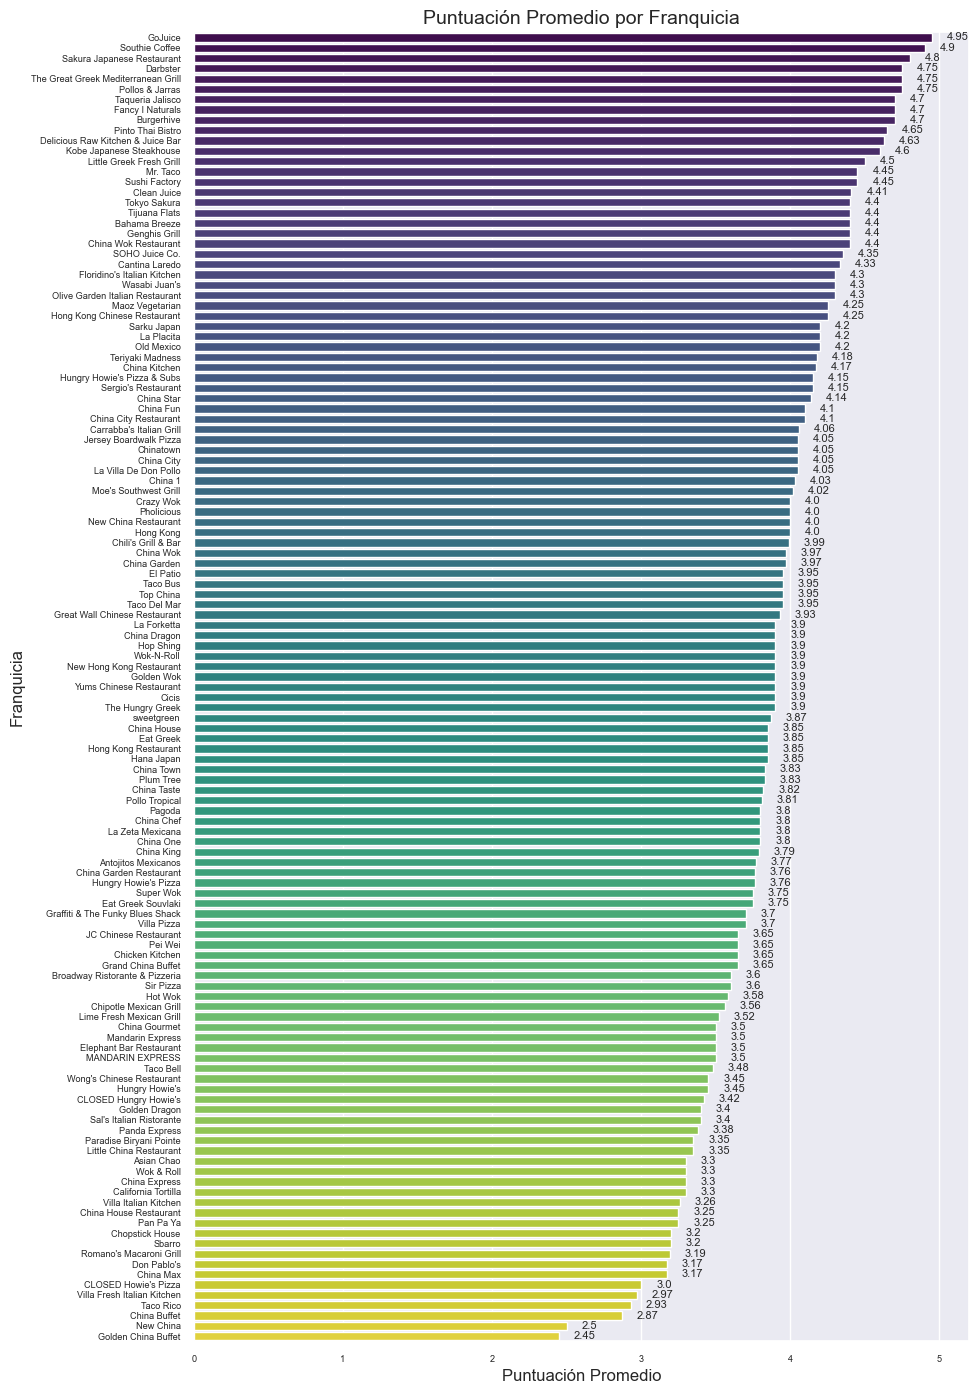

Top 25 Franquicias mejor puntuadas:
                                     stars
name                                      
GoJuice                               4.95
Southie Coffee                        4.90
Sakura Japanese Restaurant            4.80
Darbster                              4.75
The Great Greek Mediterranean Grill   4.75
Pollos & Jarras                       4.75
Taqueria Jalisco                      4.70
Fancy I Naturals                      4.70
Burgerhive                            4.70
Pinto Thai Bistro                     4.65
Delicious Raw Kitchen & Juice Bar     4.63
Kobe Japanese Steakhouse              4.60
Little Greek Fresh Grill              4.50
Mr. Taco                              4.45
Sushi Factory                         4.45
Clean Juice                           4.41
Tokyo Sakura                          4.40
Tijuana Flats                         4.40
Bahama Breeze                         4.40
Genghis Grill                         4.40
China Wok Restaura

In [158]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 17))
sns.barplot(x='stars', y='name', data=puntuacion_promedio_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Configurar título y etiquetas de ejes
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(puntuacion_promedio_por_franquicia.iterrows()):
    prom = row['stars']
    plt.text(prom + 0.1, i, f'{prom}', ha='left', va='center', fontsize=8)

# Mostrar el gráfico
plt.show()

# Imprimir el top 25 con sus valores relativos
print("Top 25 Franquicias mejor puntuadas:")
print(puntuacion_promedio_por_franquicia.head(25))
print('')
# Imprimir el bottom 30 con sus valores relativos
print("Las 30 Franquicias peor puntuadas:")
print(puntuacion_promedio_por_franquicia.tail(30))

Variacion de la puntuacion segun sucursales de la misma franquicia

In [159]:
# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
franquicia_ciudad = g_restaurants[['name', 'city','stars']]

# Ordenar segun Franquicias
franquicia_ciudad = franquicia_ciudad.sort_values('name')
franquicia_ciudad = franquicia_ciudad.reset_index(drop=True)

# Establecer name como indice
franquicia_ciudad = franquicia_ciudad.set_index('name')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
franquicia_ciudad['stars_var'] = franquicia_ciudad['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
franquicia_ciudad = franquicia_ciudad.sort_index()

# Mostrar el DataFrame resultante
franquicia_ciudad

,city,stars,stars_var
name,,,
Antojitos Mexicanos,Pompano Beach,3.7,0.163
Antojitos Mexicanos,Tampa,4.2,0.163
Antojitos Mexicanos,Fort Lauderdale,3.4,0.163
Asian Chao,Lakeland,3.3,0.600
Asian Chao,Coral Springs,3.8,0.600
...,...,...,...
Yums Chinese Restaurant,Pensacola,3.7,0.080
Yums Chinese Restaurant,Fort Myers,4.1,0.080
sweetgreen,Coconut Grove,3.7,0.023


Total de reviews por franquicia

In [178]:
franquicias_con_mas_reviews = g_restaurants.groupby('name')['review_count'].sum().to_frame().sort_values(by='review_count', ascending=False).reset_index(drop=False)

# Visualizar el resultado
franquicias_con_mas_reviews.head(10)

,name,review_count
0,Taco Bell,17771
1,Bahama Breeze,15510
2,Olive Garden Italian Restaurant,14200
3,Pollo Tropical,12426
4,Chili's Grill & Bar,9783
5,Kobe Japanese Steakhouse,7973
6,Chipotle Mexican Grill,7938
7,Tijuana Flats,4673
8,Cicis,3996
9,Hungry Howie's Pizza,3120


La franquicia con mayor cantidad de reviews es 'Taco Bell' con 17.771 reviews

Relacion entre total de reviews por franquicia y puntuacion promedio

In [179]:
# Añadir la columna 'stars' del DataFrame 'puntuacion_promedio_por_franquicia' a 'franquicias_con_mas_reviews'
franquicias_reviews_puntuacion = pd.merge(franquicias_con_mas_reviews, puntuacion_promedio_por_franquicia[['stars']], on='name')
franquicias_reviews_puntuacion = franquicias_reviews_puntuacion.sort_values(by='review_count', ascending=False)

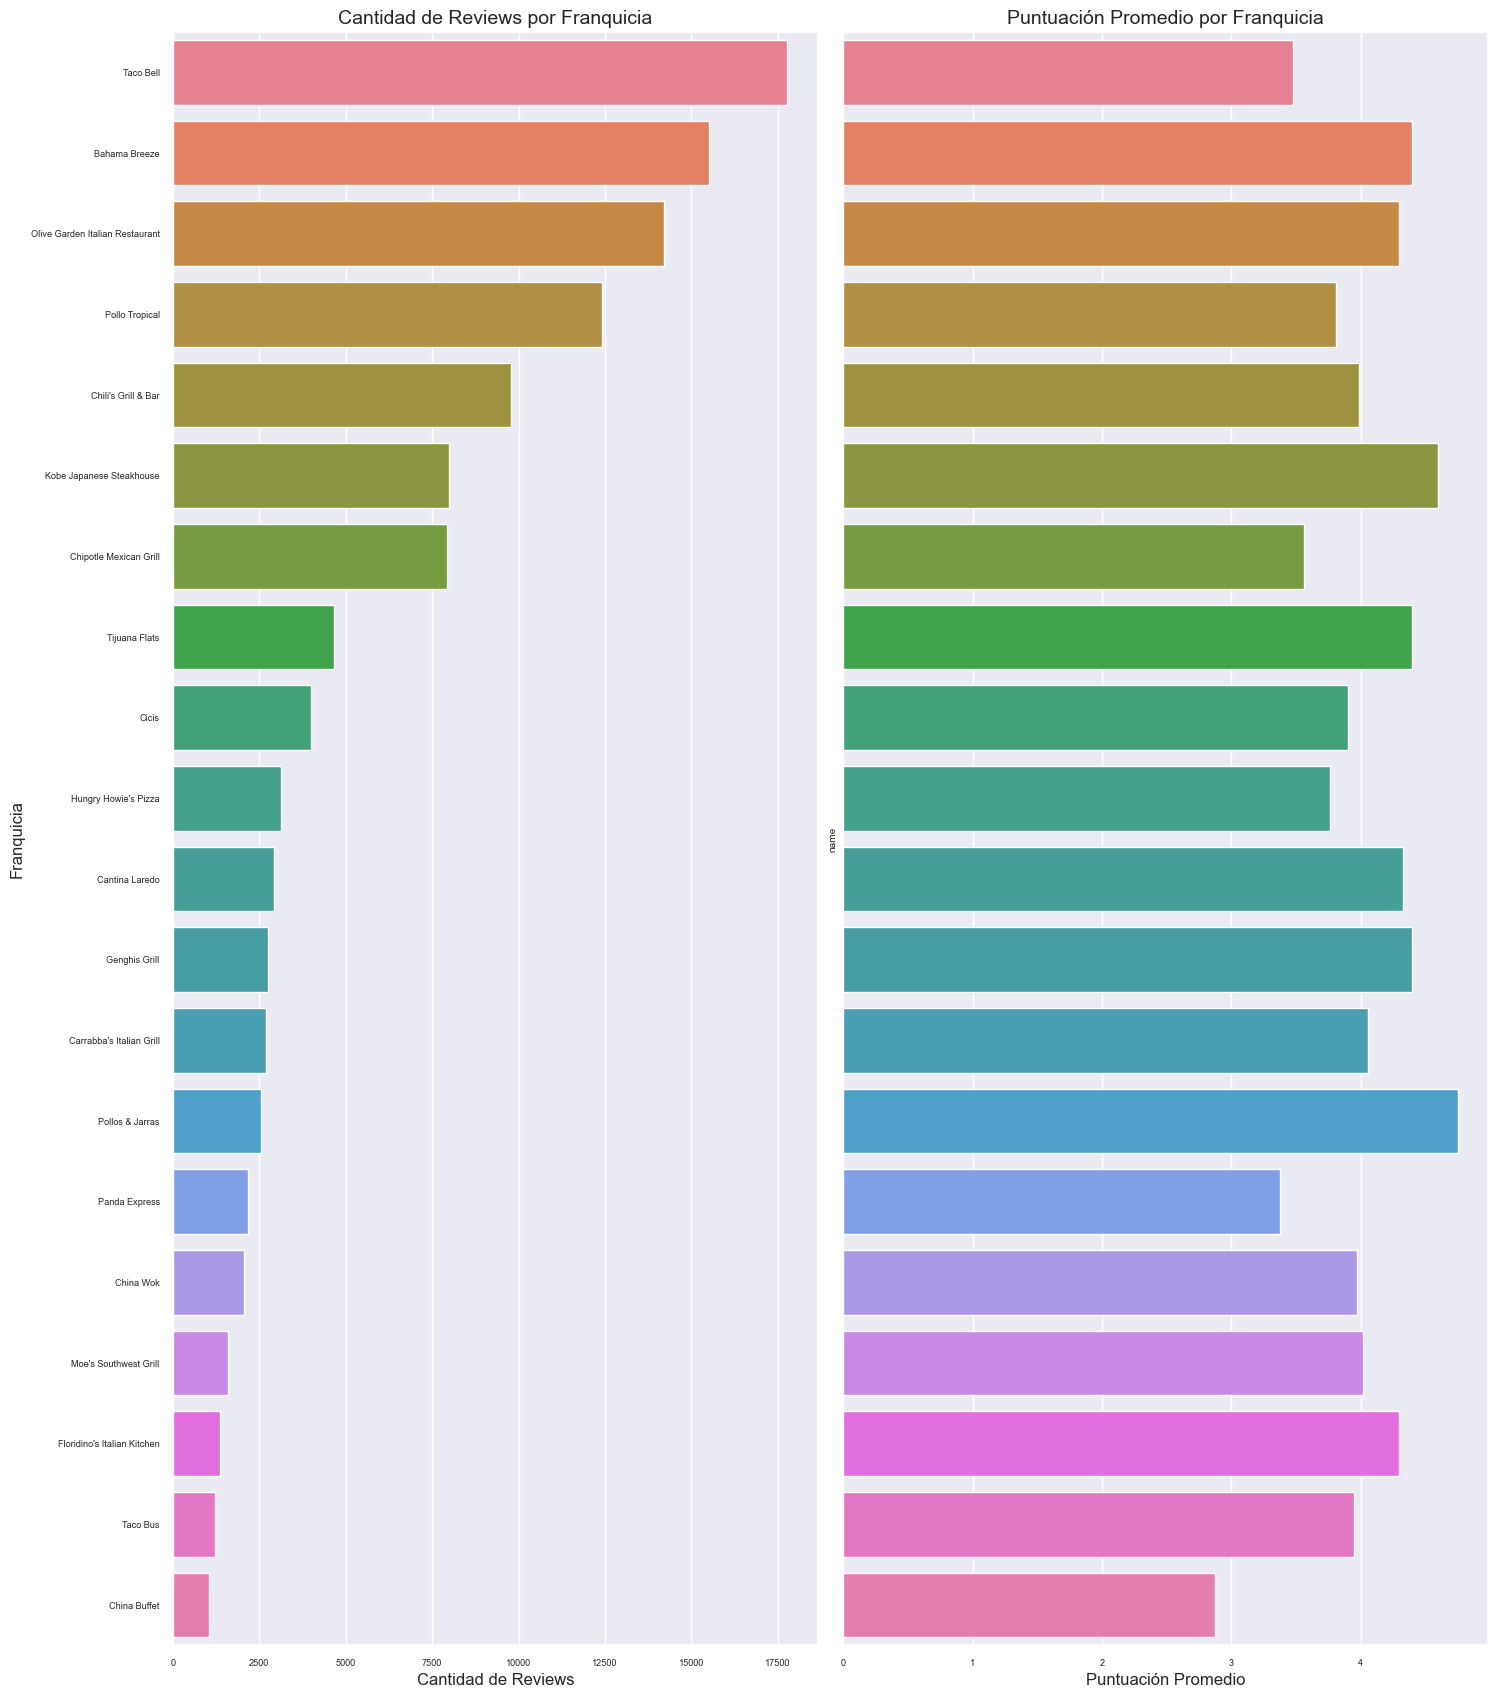

                               name  review_count  stars
0                         Taco Bell         17771   3.48
1                     Bahama Breeze         15510   4.40
2   Olive Garden Italian Restaurant         14200   4.30
3                    Pollo Tropical         12426   3.81
4               Chili's Grill & Bar          9783   3.99
5          Kobe Japanese Steakhouse          7973   4.60
6            Chipotle Mexican Grill          7938   3.56
7                     Tijuana Flats          4673   4.40
8                             Cicis          3996   3.90
9              Hungry Howie's Pizza          3120   3.76
10                   Cantina Laredo          2936   4.33
11                    Genghis Grill          2752   4.40
12         Carrabba's Italian Grill          2690   4.06
13                  Pollos & Jarras          2553   4.75
14                    Panda Express          2168   3.38
15                        China Wok          2049   3.97
16            Moe's Southwest G

In [180]:
# Filtrar franquicias donde review count es mayor a 1000 para tener representaciones mas solidas
franquicias_reviews_puntuacion_filtradas = franquicias_reviews_puntuacion[franquicias_reviews_puntuacion['review_count'] > 1000]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 17))

# Crear el primer gráfico de barras (cantidad de reviews por franquicia)
plt.subplot(1, 2, 1)  # Organizar en una matriz de 1 fila y 2 columnas, y seleccionar el primer subplot
sns.barplot(x='review_count', y='name', data=franquicias_reviews_puntuacion_filtradas, hue='name', dodge=False, legend=False)
plt.title('Cantidad de Reviews por Franquicia', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Crear el segundo gráfico de barras (puntuación promedio por franquicia)
plt.subplot(1, 2, 2)  # Seleccionar el segundo subplot
sns.barplot(x='stars', y='name', data=franquicias_reviews_puntuacion_filtradas, hue='name', dodge=False, legend=False)
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.yticks([])  # Ocultar las marcas y etiquetas del eje y del segundo subplot

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

print(franquicias_reviews_puntuacion_filtradas)


Observamos que aquellas en franquicias con mayor cantidad de reviews hay una tendencia a tener una mejor puntuacion si el numero de reviews es mayor. Pero tambien encontramos casos como 'Kobe Japanese Steakhouse' donde a menor cantidad de reviews encontramos mayores puntajes. Esto es un indicador de que el servicio es bueno y homogeneo en todas las sucursales de dicho restaurant. 

Categorias:

In [189]:
# Contabilizar keywords diferentes
print('Se encontraron', g_restaurants['categories'].nunique(), 'categorias de Restaurantes:\n' ,restaurants['categories'].unique())


Se encontraron 15 categorias de Restaurantes:
 ['Chinese' 'Mexican' 'Korean' 'Indian' 'Japanese' 'Italian' 'Asian'
 'Greek' 'Vegetarian' 'Vietnamese' 'Middle Eastern' 'Thai' 'Vegan']


In [191]:
# Frecuencias según la categoría
frecuencias_categories = g_restaurants['categories'].value_counts()

# Representación de porcentajes para cada categoría
porcentajes = (frecuencias_categories / len(g_restaurants) * 100).round(2)

# Crear DataFrame para las frecuencias y porcentajes
distribucion_por_categoria = pd.DataFrame({'RestPorCategoria': frecuencias_categories, '%': porcentajes})

# Resetear el índice para permitir el merge
distribucion_por_categoria.reset_index(inplace=True)

# Renombrar columnas
distribucion_por_categoria.rename(columns={'index': 'categories'}, inplace=True)

# Visualizar
distribucion_por_categoria

,categories,RestPorCategoria,%
0,Chinese,181,37.79
1,Mexican,116,24.22
2,Italian,90,18.79
3,Japanese,19,3.97
4,Vegetarian,19,3.97
5,Latin,17,3.55
6,Greek,10,2.09
7,Asian,8,1.67
8,Vegan,7,1.46
9,Peruvian,3,0.63


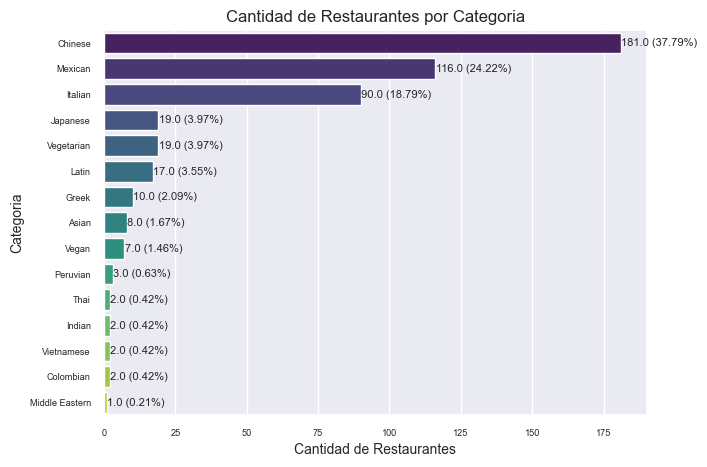

Categorias más populares:
                Recuento  Porcentaje
categories                          
Chinese              181       37.79
Mexican              116       24.22
Italian               90       18.79
Japanese              19        3.97
Vegetarian            19        3.97
Latin                 17        3.55
Greek                 10        2.09
Asian                  8        1.67
Vegan                  7        1.46
Peruvian               3        0.63
Thai                   2        0.42
Indian                 2        0.42
Vietnamese             2        0.42
Colombian              2        0.42
Middle Eastern         1        0.21


In [193]:
# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_categories / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_categoria = pd.concat([frecuencias_categories, porcentajes], axis=1)
distribucion_por_categoria.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_categoria.index, data=distribucion_por_categoria, palette="viridis", hue='categories', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_categoria.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Categoria', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Categoria', fontsize=10)

plt.show()

# Imprimir categorias mas populares
print("Categorias más populares:")
print(distribucion_por_categoria)

La información proporcionada indica que las categorías de restaurantes más populares son la Mexicana, Italiana y China.

Esta informacion concuerda para ambas fuente de datos.

### Reviews

In [194]:
# Obtener los 'gmap_id' únicos de metadata
reviews_restaurants = g_restaurants['gmap_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'gmap_id' de metadata
df_review_states = df_review_states[df_review_states['gmap_id'].isin(reviews_restaurants)]

In [195]:
# Filtrar las filas a partir del 2021 
df_review_states = df_review_states[df_review_states['date'] >= '2021-01-01'].reset_index(drop=True)

In [196]:
df_review_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             6485 non-null   float64
 1   name                6485 non-null   object 
 2   stars               6485 non-null   int64  
 3   gmap_id             6485 non-null   object 
 4   date                6485 non-null   object 
 5   hour                6485 non-null   object 
 6   sentiment_analysis  6485 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 354.8+ KB


**Descripción general:**

- **Tamaño:** 6.485 registros (reviews) y 8 columnas (descripcion). 
- **Tipos de datos:**
    - `object`: user_id, name, text, gmpa_id, date, hour.
    - `int64`: stars, sentiment_analysis.

- **Variables nominales:**
    - `user_id`: identificador único de usuario.
    - `name`: nombre de usuario.

- **Variables numéricas:**
    - `stars`: Representa las calificaciones en "estrellas" en un rango del 1 al 5, donde 1 es la calificación más baja y 5 es la más alta. 

- **Variables categóricas:**
    - `date`: Fecha en la que se realizo la reseña.
    - `hour`: Hora en la que se realizo la reseña.
    - `sentiment_analysis`: Sentiment analysis de reviews.

In [197]:
df_review_states.describe()

,user_id,stars,sentiment_analysis
count,6.485000e+03,6485.000000,6485.000000
mean,1.091685e+20,4.110100,1.403547
std,5.259750e+18,1.268502,0.820477
min,1.000029e+20,1.000000,1.000000
25%,1.046513e+20,4.000000,1.000000
50%,1.090475e+20,5.000000,1.000000
75%,1.137393e+20,5.000000,1.000000
max,1.184397e+20,5.000000,4.000000


In [88]:
df_review_states.duplicated().sum()

0

No se encontraron duplicados

In [ ]:
df_review_states.isna().sum()

user_id               0
name                  0
stars                 0
gmap_id               0
date                  0
hour                  0
sentiment_analysis    0
dtype: int64

No se encontraron nulos

In [90]:
# Conteo para saber cuales son los establecimientos con mayor numero de reseñas
df_review_states['gmap_id'].value_counts()

gmap_id
0x88e771e60252bab5:0x79e4f5754c5966c2    215
0x88e7129b2a6ad2f9:0xf0ef364f7795d1e1    213
0x88dd7c22eed47c8f:0x4635e9809b48a0fe    209
0x88c2fa5b7722ba99:0xeea89a2f9975be62    194
0x88dd473e41176501:0x9c4ec699dff0ec2c    193
                                        ... 
0x88e769a3f75a633f:0x50c410a87d7ad4c0      1
0x88de044776f2faa1:0xef80b9acd6de619c      1
0x88ee9b2c18042705:0xf0fadf698bfe743d      1
0x88df2a97e5e9b855:0xec4bb9514ccfdebd      1
0x88d904d50c061223:0x1e6fcb2120a61673      1
Name: count, Length: 163, dtype: int64

In [198]:
# Número de clientes que opinan más de una vez sobre el mismo establecimiento
clientes_establecimiento = df_review_states.groupby(['user_id', 'gmap_id']).size().reset_index(name='count')
clientes_multiples_reseñas = clientes_establecimiento[clientes_establecimiento['count'] > 1]

# Número de clientes que opinan solo una vez sobre el mismo establecimiento
clientes_reseñas_unicas = clientes_establecimiento[clientes_establecimiento['count'] == 1]

# Contar el número de 'user_id' para cada grupo 
numero_clientes_multiples_reseñas = clientes_multiples_reseñas['user_id'].nunique()
numero_clientes_reseñas_unicas = clientes_reseñas_unicas['user_id'].nunique()

# Proporción de clientes con múltiples o solo una reseña para el mismo establacimiento
proporcion_clientes_multiples_reseñas = numero_clientes_multiples_reseñas / df_review_states['user_id'].nunique() * 100
proporcion_clientes_reseñas_unicas = numero_clientes_reseñas_unicas / df_review_states['user_id'].nunique() * 100

# Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
rangos_por_user = df_review_states.groupby('user_id')['gmap_id'].nunique()

print(f"Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña")
print(rangos_por_user)
print(f"Clientes con mas de una reseña por establecimiento: {proporcion_clientes_multiples_reseñas}%")
print(f"Clientes con solo una reseña por establecimiento: {proporcion_clientes_reseñas_unicas}%")

Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
user_id
1.000029e+20    1
1.000061e+20    1
1.000080e+20    1
1.000263e+20    1
1.000295e+20    1
               ..
1.184213e+20    1
1.184245e+20    1
1.184294e+20    1
1.184382e+20    1
1.184397e+20    1
Name: gmap_id, Length: 6328, dtype: int64
Clientes con mas de una reseña por establecimiento: 0.0%
Clientes con solo una reseña por establecimiento: 100.0%


In [92]:
# Mapeamos 'gmap_id' a 'name' en un diccionario
id_to_name = dict(zip(g_restaurants['gmap_id'], g_restaurants['name']))

# Creamos una nueva columna 'name' en df_review_states usando el diccionario de mapeo
df_review_states['name'] = df_review_states['gmap_id'].map(id_to_name)
df_review_states

,user_id,name,stars,gmap_id,date,hour,sentiment_analysis
0,1.179071e+20,Pinto Thai Bistro,5,0x88e44996b8b1cdd5:0x12521570331b2689,2021-06-21,15:56:44,1
1,1.099870e+20,Pinto Thai Bistro,5,0x88e44996b8b1cdd5:0x12521570331b2689,2021-03-02,17:26:17,1
2,1.041394e+20,Pinto Thai Bistro,5,0x88e44996b8b1cdd5:0x12521570331b2689,2021-08-14,18:24:43,3
3,1.080580e+20,Pinto Thai Bistro,5,0x88e44996b8b1cdd5:0x12521570331b2689,2021-03-17,00:34:07,1
4,1.170220e+20,Pinto Thai Bistro,4,0x88e44996b8b1cdd5:0x12521570331b2689,2021-05-08,17:39:20,1
...,...,...,...,...,...,...,...
6480,1.002542e+20,Taco Bell,5,0x88e7785313ce957d:0x7042cea1d0abdac8,2021-03-08,20:10:22,1
6481,1.018407e+20,Taco Bell,4,0x88e7785313ce957d:0x7042cea1d0abdac8,2021-03-31,13:04:47,1
6482,1.171555e+20,Wong's Chinese Restaurant,3,0x88d9051c0cc9d019:0x92013a2d606f67a9,2021-03-24,13:28:10,1
6483,1.169439e+20,Wong's Chinese Restaurant,5,0x88d9051c0cc9d019:0x92013a2d606f67a9,2021-01-06,05:03:00,1


Sentiment Analysis:

In [94]:
# Calcula la cantidad de registros para cada valor único en 'sentiment_analysis'
sentiment_counts = df_review_states['sentiment_analysis'].value_counts()

# Calcula el total de registros en el DataFrame
total_registros = len(df_review_states)

# Calcula el porcentaje de cada valor único en 'sentiment_analysis' respecto al total de registros
porcentaje_por_valor = ((sentiment_counts / total_registros) * 100).round(2)

# Convierte los resultados en un DataFrame para facilitar su manipulación
df_porcentaje = porcentaje_por_valor.reset_index()
df_porcentaje.columns = ['sentiment_analysis', 'porcentaje']
df_porcentaje = df_porcentaje.sort_values(by='sentiment_analysis', ascending=True).reset_index(drop=True)
df_porcentaje['Descripcion'] = ['Negativo','Neutro','Positivo','Muy Positivo']

# Visualizar resultado
df_porcentaje

,sentiment_analysis,porcentaje,Descripcion
0,1,77.42,Negativo
1,2,8.64,Neutro
2,3,10.10,Positivo
3,4,3.84,Muy Positivo


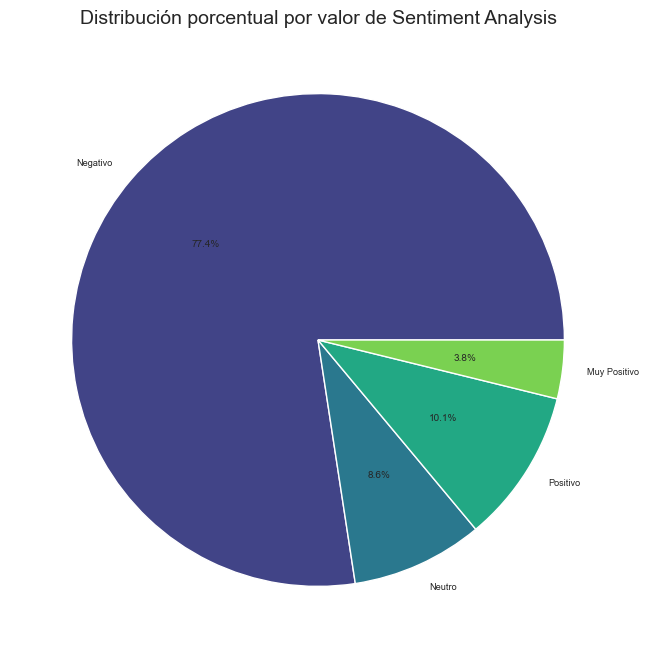

In [95]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(8, 8))

# Porcentajes y etiquetas
porcentajes = df_porcentaje['porcentaje']
etiquetas = df_porcentaje['Descripcion']

# Colores
colores = sns.color_palette("viridis", len(etiquetas))

# Graficar el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colores)

# Título del gráfico
plt.title('Distribución porcentual por valor de Sentiment Analysis', fontsize=14)

# Mostrar el gráfico
plt.show()

Se analizaron las reseñas utilizando un sistema de análisis de sentimiento que las clasificó en cuatro categorías:

* Negativo: Sentimiento negativo hacia el producto o servicio.
* Neutro: Sentimiento neutral o indiferente.
* Positivo: Sentimiento positivo hacia el producto o servicio.
* Muy Positivo: Sentimiento muy favorable hacia el producto o servicio.

La mayoría de las reseñas (77.4%) tienen un sentimiento negativo, lo que indica que hay una considerable insatisfacción. La cantidad de reseñas con sentimiento positivo representa (10.1%), lo que indica que algunos pocos clientes están satisfechos respecto del total. El porcentaje de reseñas neutrales es medio (8.6%). El porcentaje de reseñas muy buenas es bajo (3.8%).

Sensentiment_analysis mas frecuente por business_id (establecimientos):

In [199]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'gmap_id'
mode_sentiment = df_review_states.groupby('gmap_id')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame()

# Agregamos 'name' correspondiente a cada 'gmap_id'
mode_sentiment = pd.merge(mode_sentiment, df_review_states[['gmap_id', 'name']], on='gmap_id', how='left').drop_duplicates().sort_values(by='sentiment_analysis', ascending=False).reset_index(drop=True)

# Mostrar el resultado
mode_sentiment

,gmap_id,sentiment_analysis,name
0,0x88d9bb1366392ff7:0xaf6995b235a9722b,3,Matias Dri
1,0x88de044776f2faa1:0xef80b9acd6de619c,2,C. Ski
2,0x88598c49c4b2cf43:0x900e9e7e3fdd43c5,1,Patty Ferguson
3,0x88dd7c22eed47c8f:0x4635e9809b48a0fe,1,Carly Visser
4,0x88dd7c22eed47c8f:0x4635e9809b48a0fe,1,Mohammad Wazani
...,...,...,...
6470,0x88d9079238530e57:0x7caae4ce76538b9c,1,Jose Rivera
6471,0x88d9079238530e57:0x7caae4ce76538b9c,1,Patrice P.
6472,0x88d9079238530e57:0x7caae4ce76538b9c,1,Paulette Rice
6473,0x88d9079238530e57:0x7caae4ce76538b9c,1,Robert De la Crica


Los establecimientos en los que predominan revies mas positivas perteneces a Matias Dri y C. Ski.

Sensentiment_analysis mas frecuente por Franquicia

In [200]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'name'
mode_name = df_review_states.groupby('name')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame().sort_values(by='sentiment_analysis', ascending=False)

# Mostrar el resultado
mode_name

,sentiment_analysis
name,
Rick Combs,4
Deon Hawkins,4
LionRoar Ferguson,4
Lisa Bell,4
Tamara Kelly,4
...,...
Jason Rozanek,1
Jason Rambo,1
Jason Moore,1


Algunas de las franquicias con reviews mas positivas son Rick Combs, Deon Hawkins, LionRoar Ferguson, Lisa Bell, Tamara Kelly, entre otras.

Distribucion de registros de reviews en 24 hs:

C:\Users\ponoh\AppData\Local\Temp\ipykernel_4916\297495324.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review_states['H'] = pd.to_datetime(df_review_states['hour'])


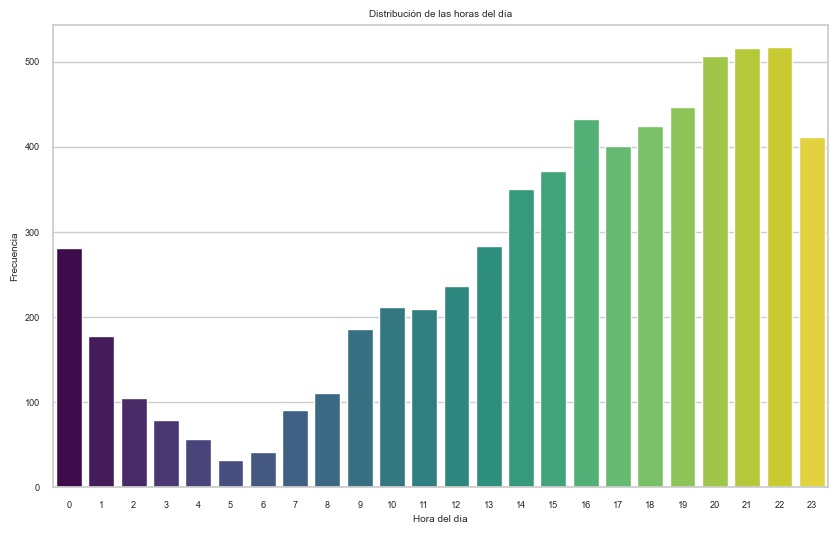

In [98]:
# Convertir la columna 'hour' a tipo datetime
df_review_states['H'] = pd.to_datetime(df_review_states['hour'])

# Extraer la hora de cada entrada
df_review_states['H'] = df_review_states['H'].dt.hour

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot
sns.countplot(x='H', data=df_review_states, palette='viridis', hue='H', legend=False)

# Configurar título y etiquetas de ejes
plt.title('Distribución de las horas del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Segun el grafico anterior se ve mayor actividad de los usuarios, realizando reviews de los restaurantes desde las 16 hs hasta las 2 hs. Esto concuerda con la actividad y horarios en los que los establecimientos gastronomicos suelen estar abiertos y en los cuales suele concurrir mas clientes.

La cantidad de reviews tiene tendencia a crecer desde las 6 a 00 hs donde comienza a decrecer nuevamente